# House Price Prediction- _Regression With Neural Network Model_

# Dataset Metadata

## Description
Dataset contains **house sale prices** for **King County**, which includes Seattle. It includes homes sold between **May 2014 and May 2015**.


## Features Available
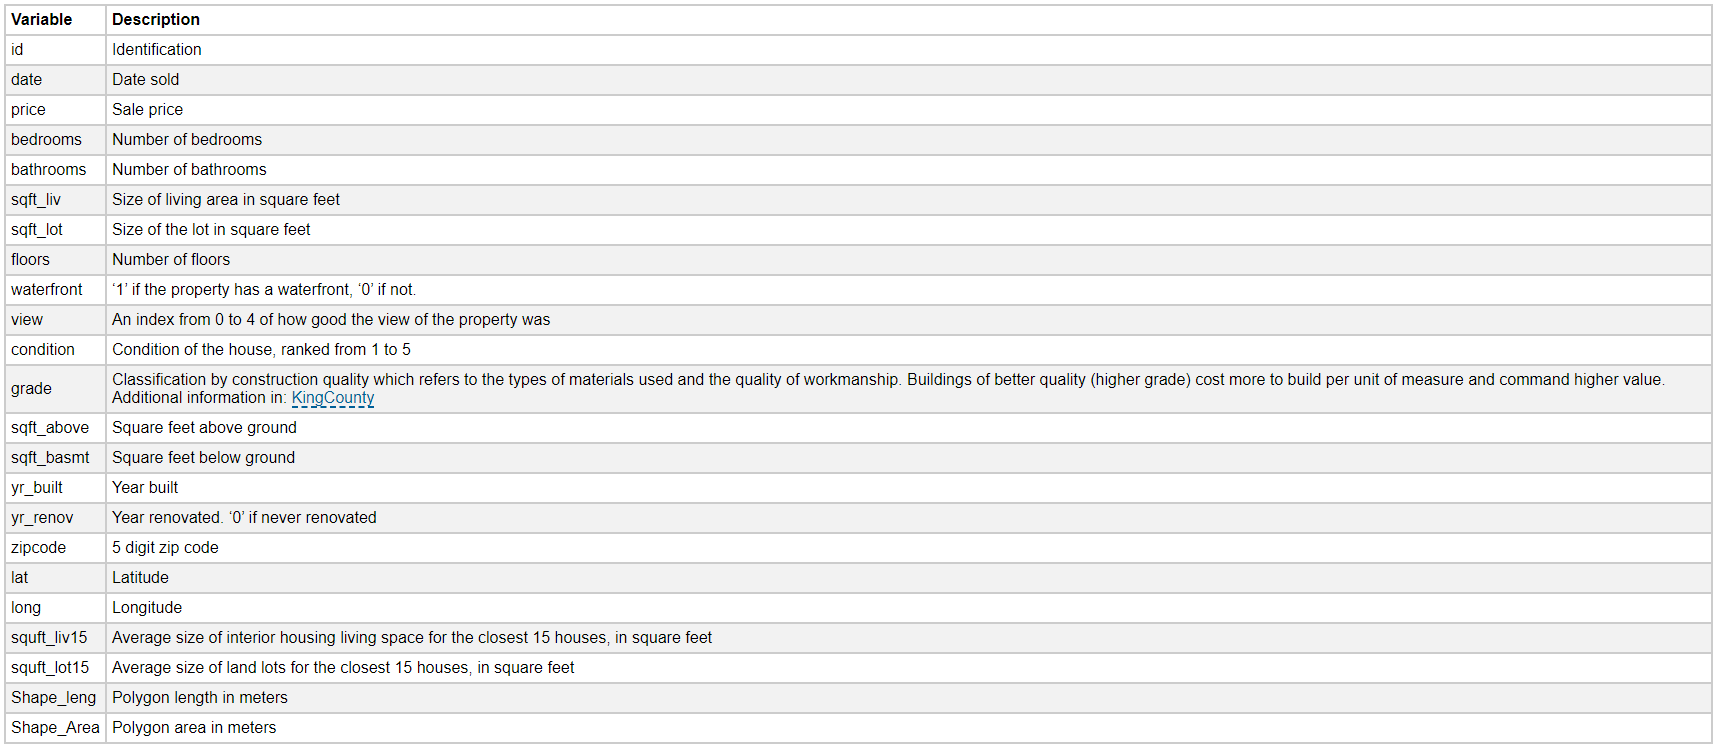

## Target Variable
1. `price`: Sale Price of house ($)

## Source
[Kaggle Open-source Datasets](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
# file
filepath = r"D:\ML\Deep Learning_Practical\TF & Keras\Keras Regression Basics\Housing Price\data\kc_house_data.csv"

In [3]:
# load as dataframe

df = pd.read_csv(filepath)

In [4]:
# check
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [5]:
# check missing data

df.isnull().sum(axis=0).sum()

0

In [6]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# basic stats

df.describe().T

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

---
>_Dataset has **no missing values**.\
To make things easier to understand will plot some visualizations._
---

## Visualizing the Data

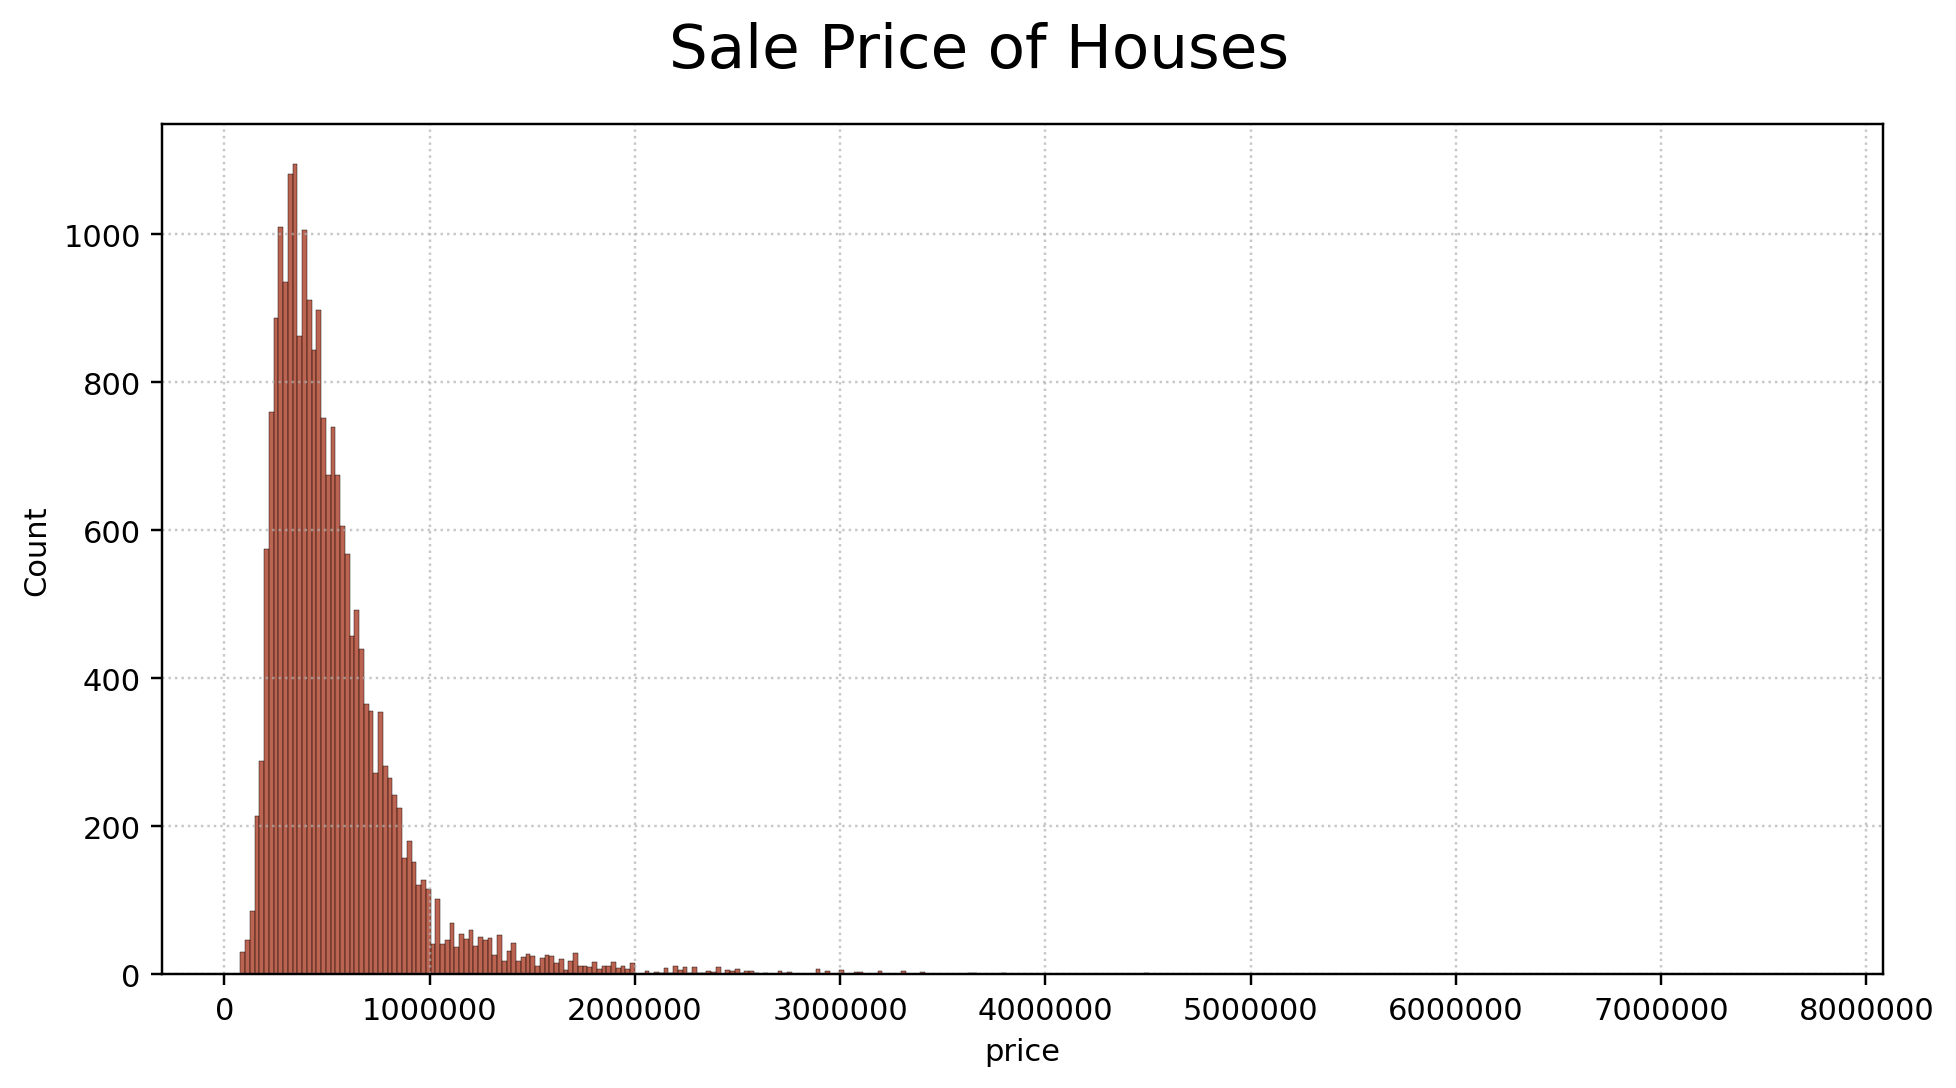

In [8]:
# distribution of sale price of all the houses

fig, ax = plt.subplots(figsize=(9,5), dpi=220)

sns.histplot(x="price", data=df, ax=ax, color="#A53017")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain", useOffset=True)

fig.suptitle("Sale Price of Houses", fontsize=20)
fig.tight_layout();

---
>_Dataset has some **extreme outlier houses** which sold for **very high price** as indicated by the **right skew** of the histogram._

>_May need to **remove** these outliers before training a NN for better accuracy._
---

## Distribution of Selected Features
>_How many houses belonged to each type of choices available under that feature?_

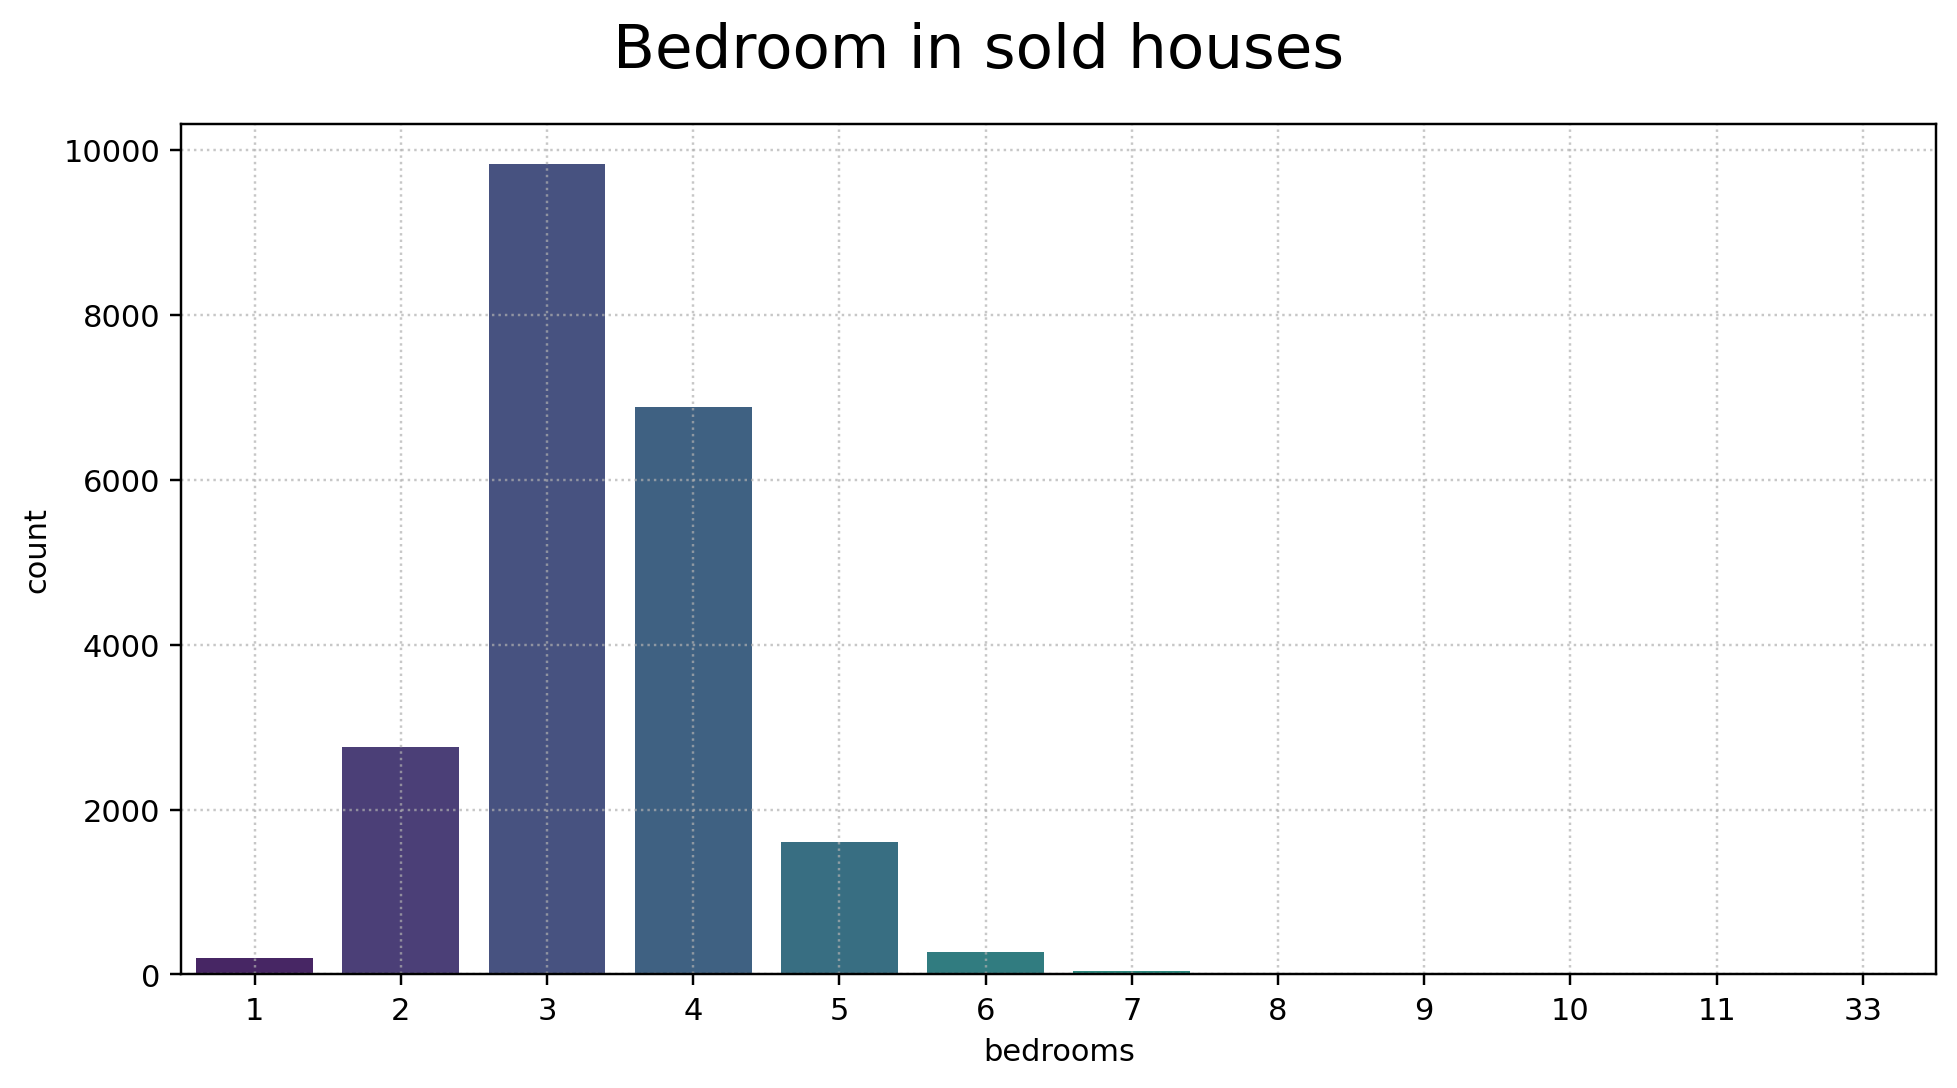

In [9]:
fig, ax = plt.subplots(figsize=(9,5), dpi=220)

sns.countplot(x="bedrooms", data=df, ax=ax, palette="viridis")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)


fig.suptitle("Bedroom in sold houses", fontsize=20)
fig.tight_layout();

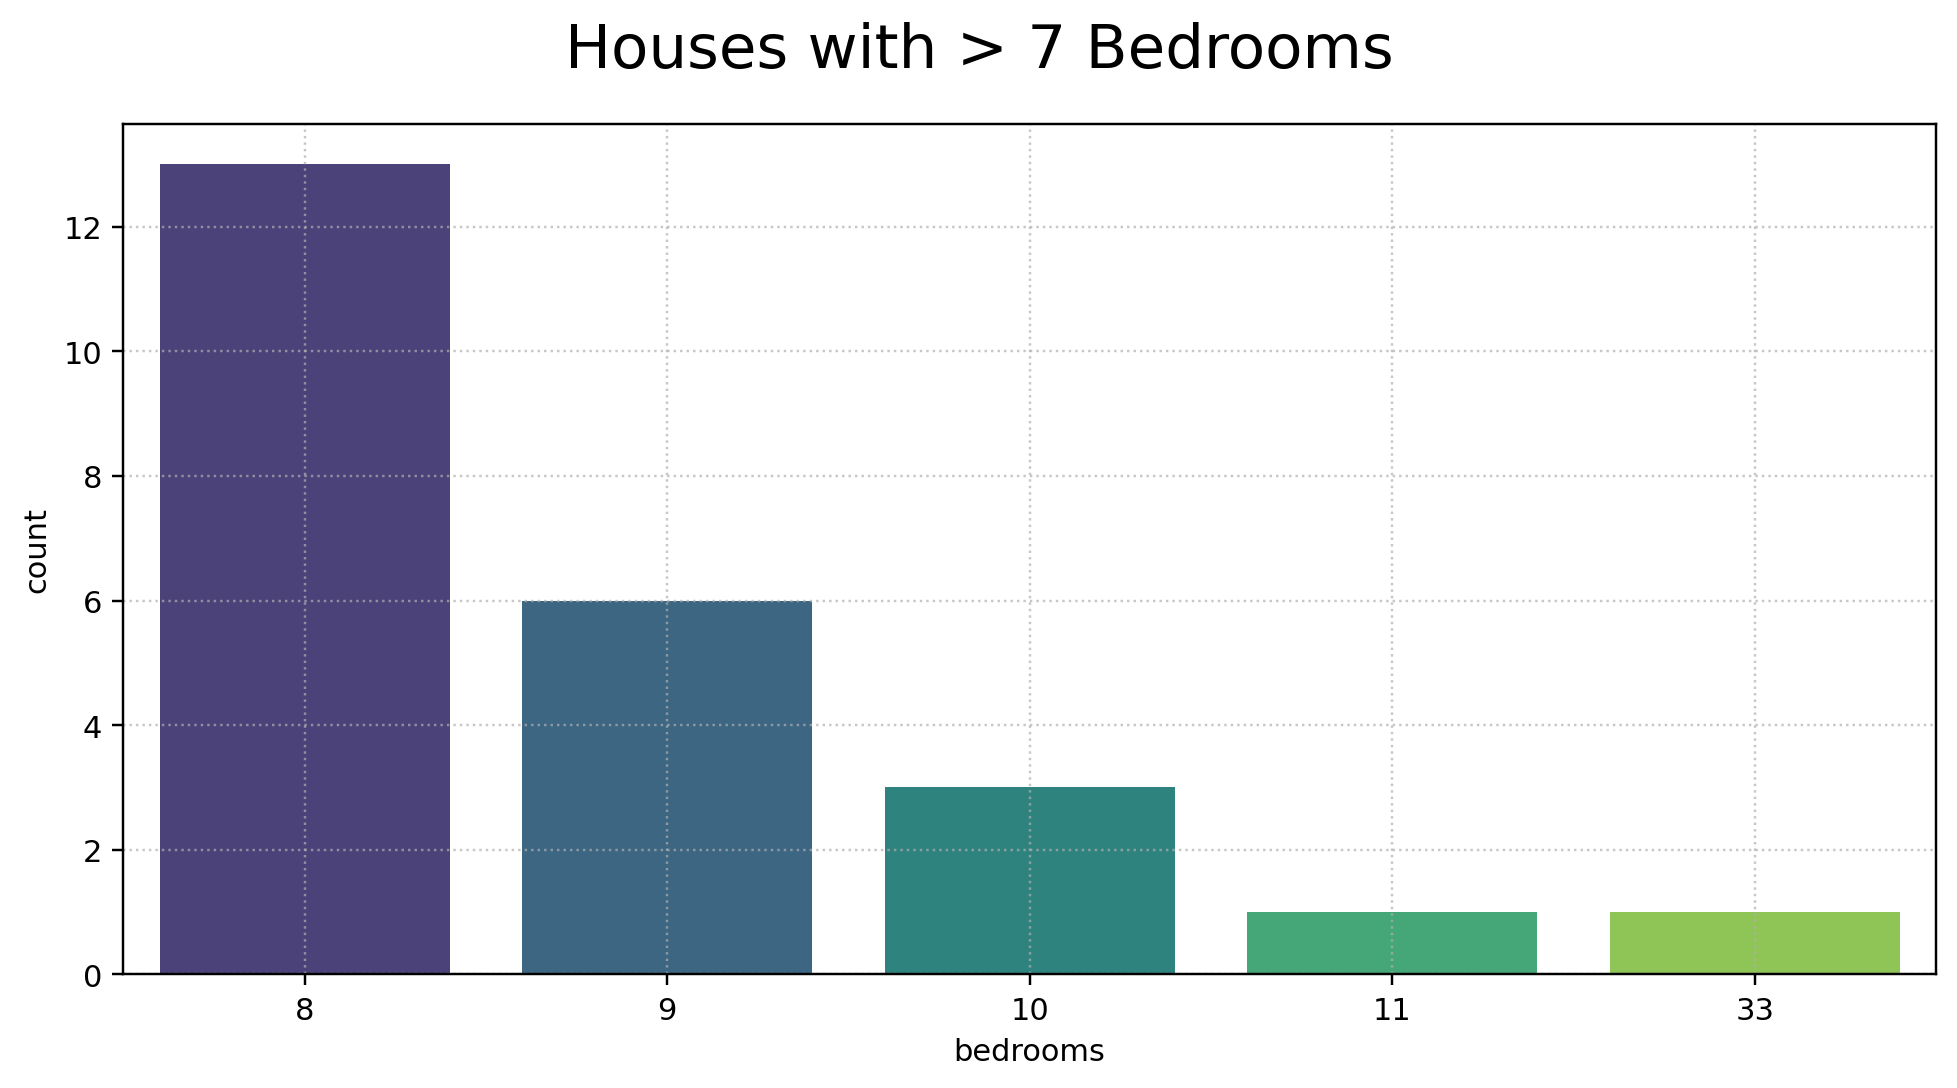

In [10]:
# check houses with > 7 bedrooms
mask = (df["bedrooms"] > 7)

fig, ax = plt.subplots(figsize=(9,5), dpi=220)

sns.countplot(x="bedrooms", data=df[mask], ax=ax, palette="viridis")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)


fig.suptitle("Houses with > 7 Bedrooms", fontsize=20)
fig.tight_layout();

---
>_Majority of houses had either **3 or 4 bedrooms**._
>_Some outlier houses had $>7\;Bedrooms$ including **one with 33 bedrooms**!_
---

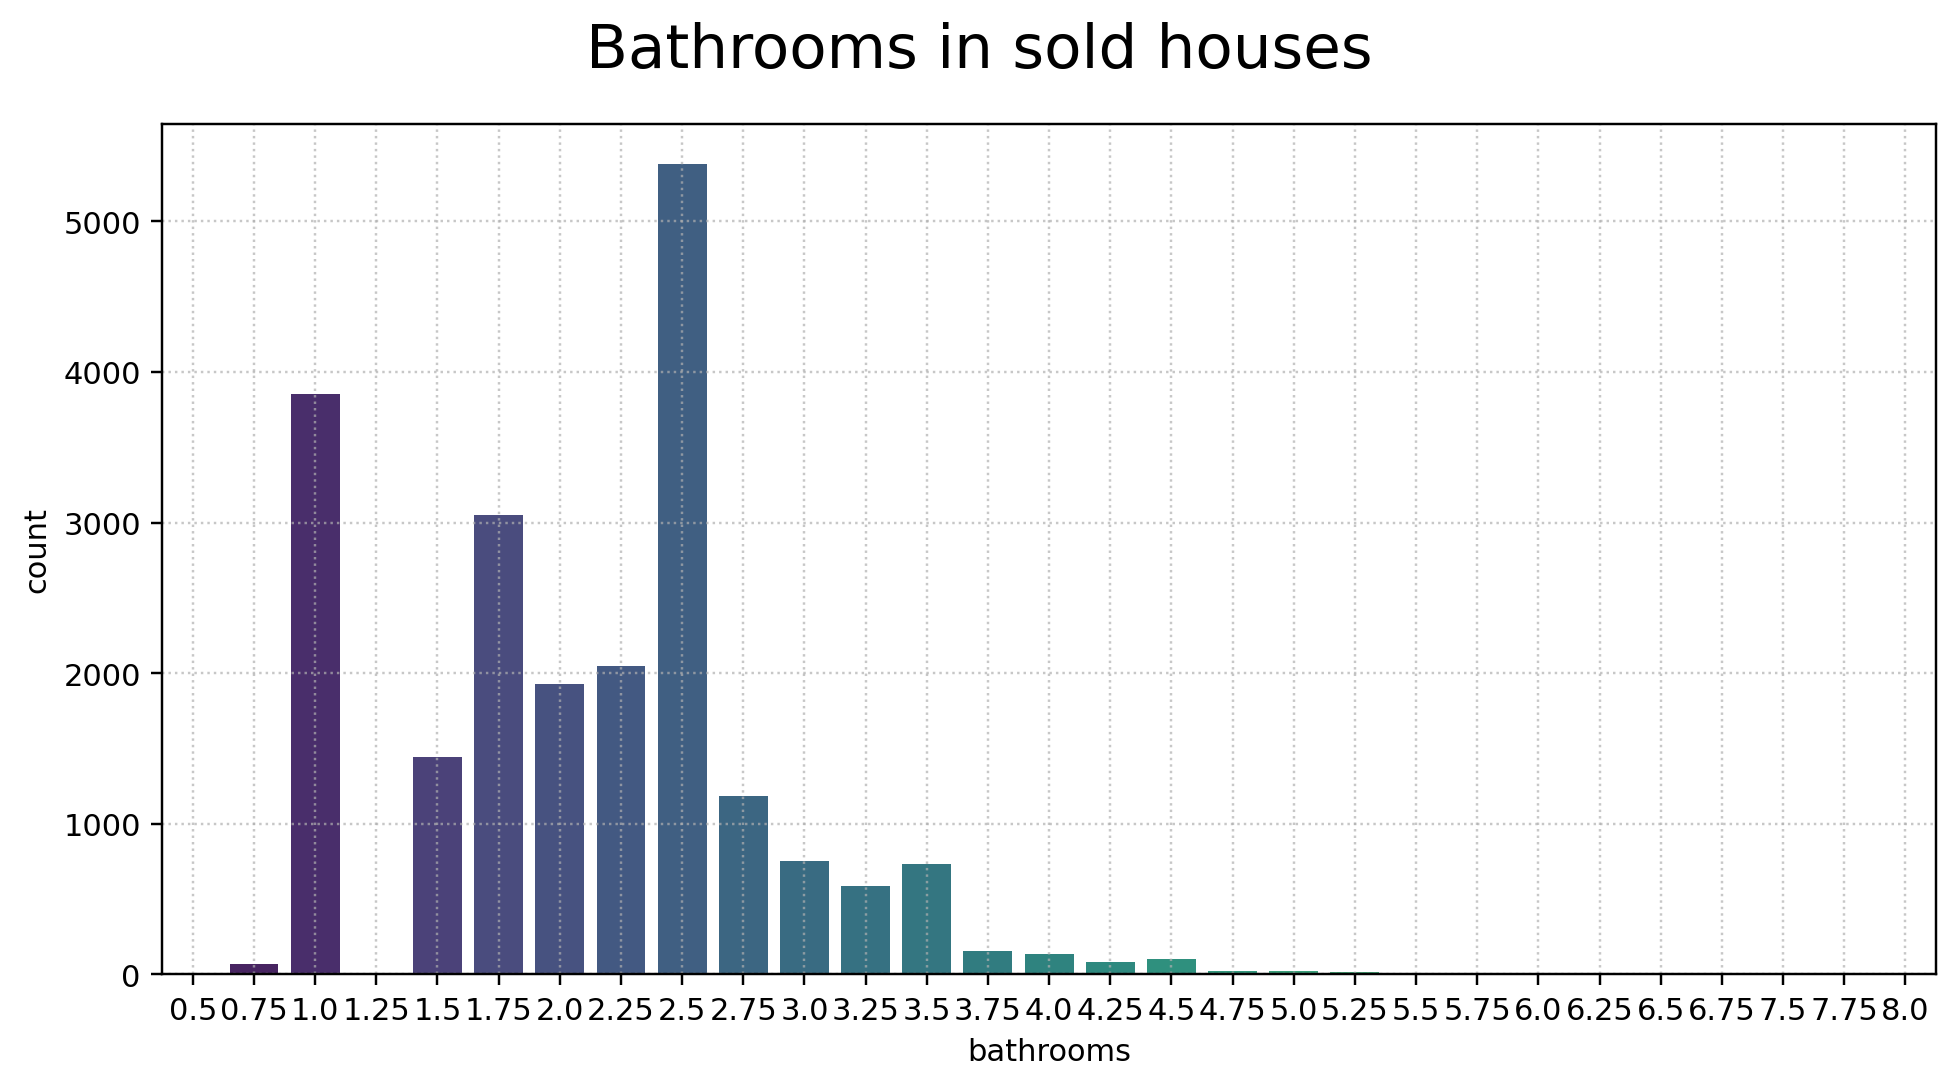

In [11]:
fig, ax = plt.subplots(figsize=(9,5), dpi=220)

sns.countplot(x="bathrooms", data=df, ax=ax, palette="viridis")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

# ax.legend(loc="best")
fig.suptitle("Bathrooms in sold houses", fontsize=20)
fig.tight_layout();

### Creating Column for Age of House

In [12]:
# helper function to extract year of built
def age(date):
    year = date.split("/")[-1]
    return int(year)

In [13]:
# separate column for year of sale
df["year_sold"] = df["date"].apply(func=age)

In [14]:
# new column for age of house
df["age"] = df["year_sold"] - df["yr_built"]

In [15]:
mask_age = ((df["age"] >= df["age"].quantile(0.25)) & (df["age"] <= df["age"].quantile(0.75))) 

##### NOTE: Alternative easier method

```python
# convert into datetime object
df["date"] = pd.to_datetime(df["date"])

# create new column by extracting year
df["year"] = df["date"].apply(func=lambda date: date.month)
                               
```

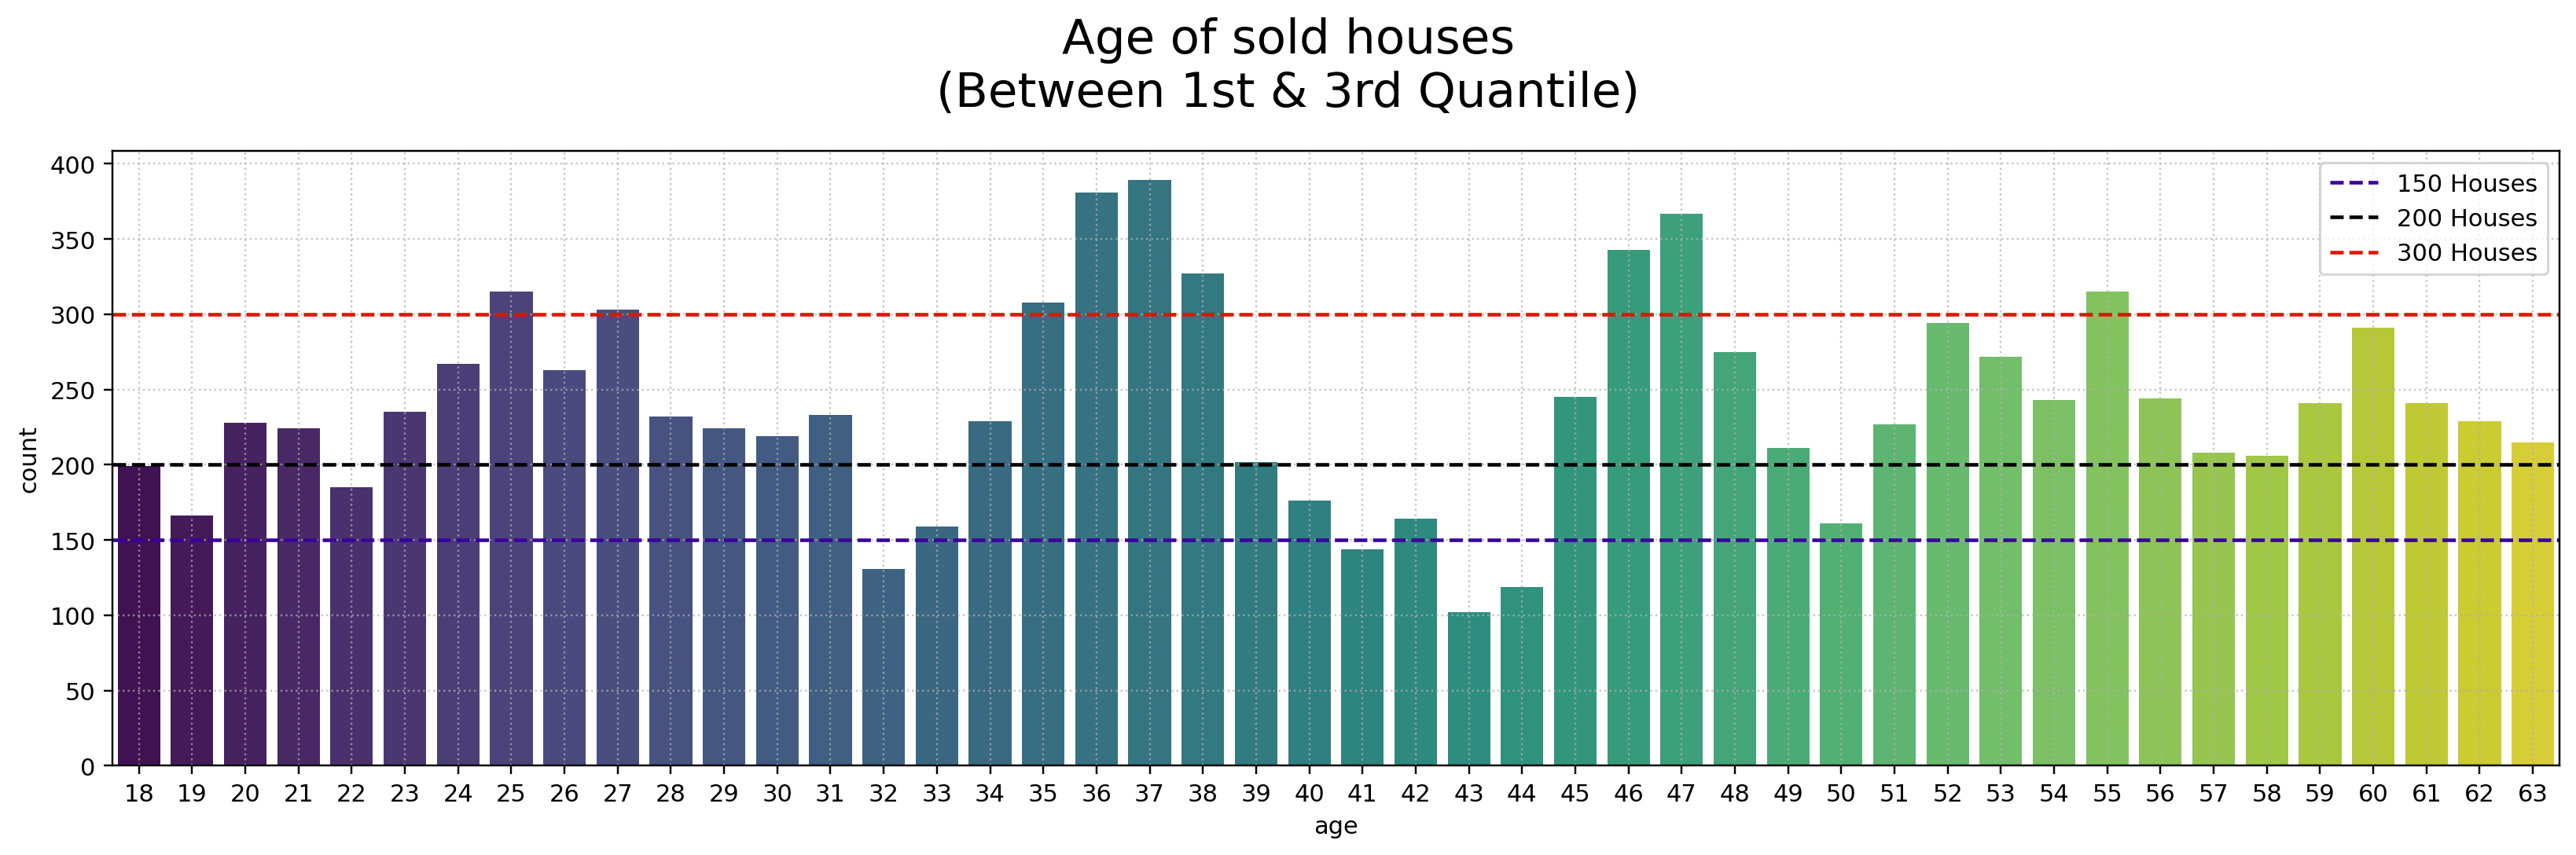

In [16]:
fig, ax = plt.subplots(figsize=(15,5), dpi=220)

sns.countplot(x="age", data=df[mask_age], ax=ax, palette="viridis")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax.axhline(y=150, linestyle="--", label="150 Houses", color="#39009D")
ax.axhline(y=200, linestyle="--", label="200 Houses", color="black")
ax.axhline(y=300, linestyle="--", label="300 Houses", color="#DC1700")

# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

ax.legend(loc="best")
fig.suptitle("Age of sold houses\n(Between 1st & 3rd Quantile)", fontsize=20)
fig.tight_layout();

---
>_**75% houses** were sold **after 18 years** of being built.\
**25% houses** sold **within 2 decades** of being built, and another **25% houses** were sold **after 63 years** of being built._
>>_This may suggest that houses were sold **primarily NOT for profit gains** but for other reasons._

>_Overall in this range houses are quite well distributed and don't show any stark trend._
---

### Dropping unnecessary columns

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'age'],
      dtype='object')

In [18]:
cols_drop = ["date", "id"]
df = df.drop(columns=cols_drop)

In [19]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  age  
0    98178  47.5112 -122.257           1340        5650       2014   59  
1    98125  47.7210 -122.319           1690        7639       2014   63  
2    98028  47.7379 -122.233           2720        8062       2015   82  
3    98136  47.5208 -122.393           1360        5000       2014   49  
4    98074  47.6168 -122.045           1800        7503       2015   28  

[5 rows x 21 columns]

## Exploring How Features are Inter-related

### Influence of various Features on Sale Price

In [20]:
# correlation coefficient

correlation = df.corr()["price"].sort_values(ascending=False)

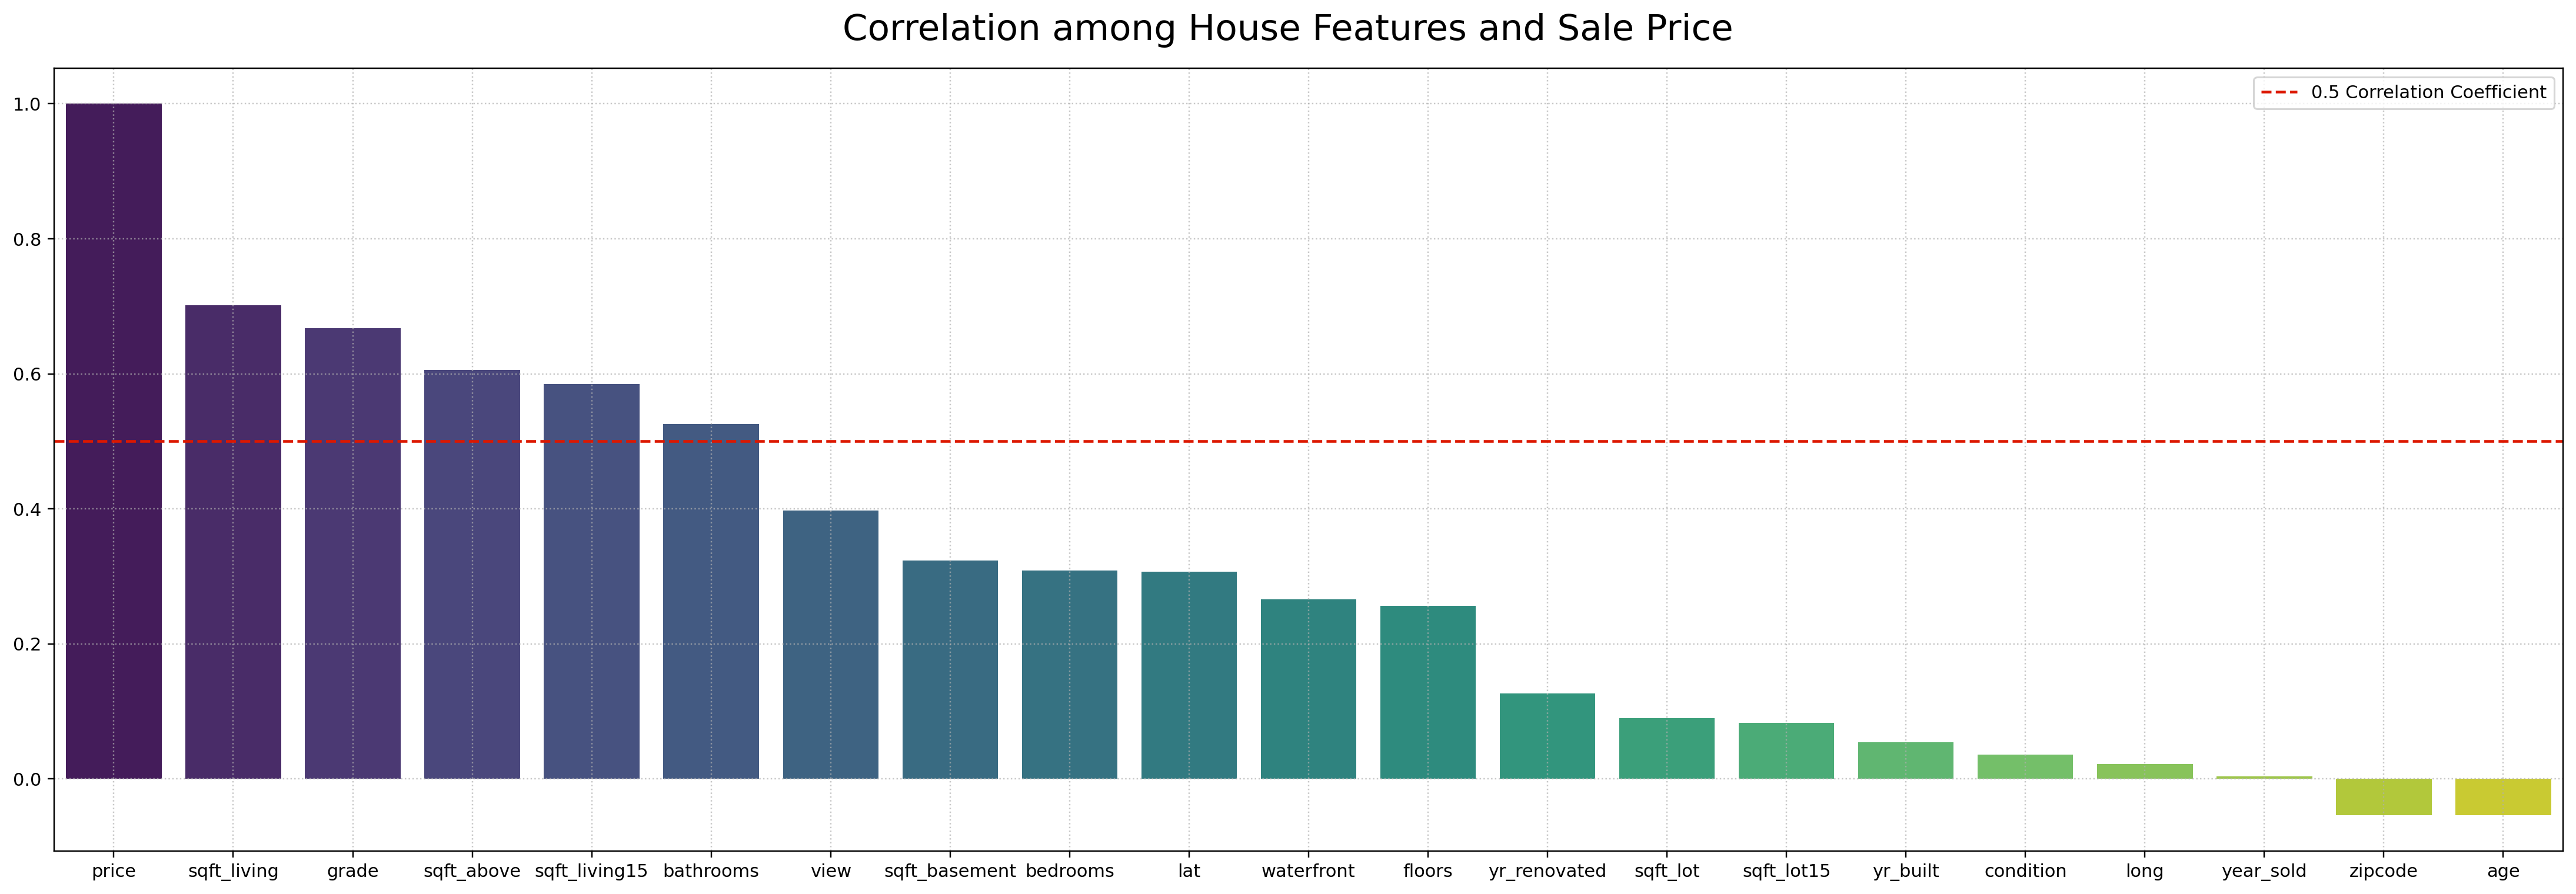

In [21]:
fig, ax = plt.subplots(figsize=(20,7), dpi=220)

sns.barplot(x=correlation.index, y=correlation.values,
            ax=ax, palette="viridis")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.axhline(y=0.5, linestyle="--", color="#DC1700", label="0.5 Correlation Coefficient")
# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

ax.legend(loc="best")
fig.suptitle("Correlation among House Features and Sale Price", fontsize=20)
fig.tight_layout();

>_Following house features are the **top 5 deciders for sale price**_ $\rightarrow$
>>1. **Living area** ($ft^2$)
>>2. **Construction quality** (`grade`)
>>3. **Area above ground** ($ft^2$) (`sqft_above`)
>>4. Average size of **interior housing living space** for the **closest 15 houses** ($ft^2$) (`sqft_living15`)
>>5. No. of **Bathrooms**

>_It is interesting to note that **area of other houses in neighborhood** matter a lot when deciding the final sale price. Could be an indicator that **social status** associated with owning a house may have been an important factor._

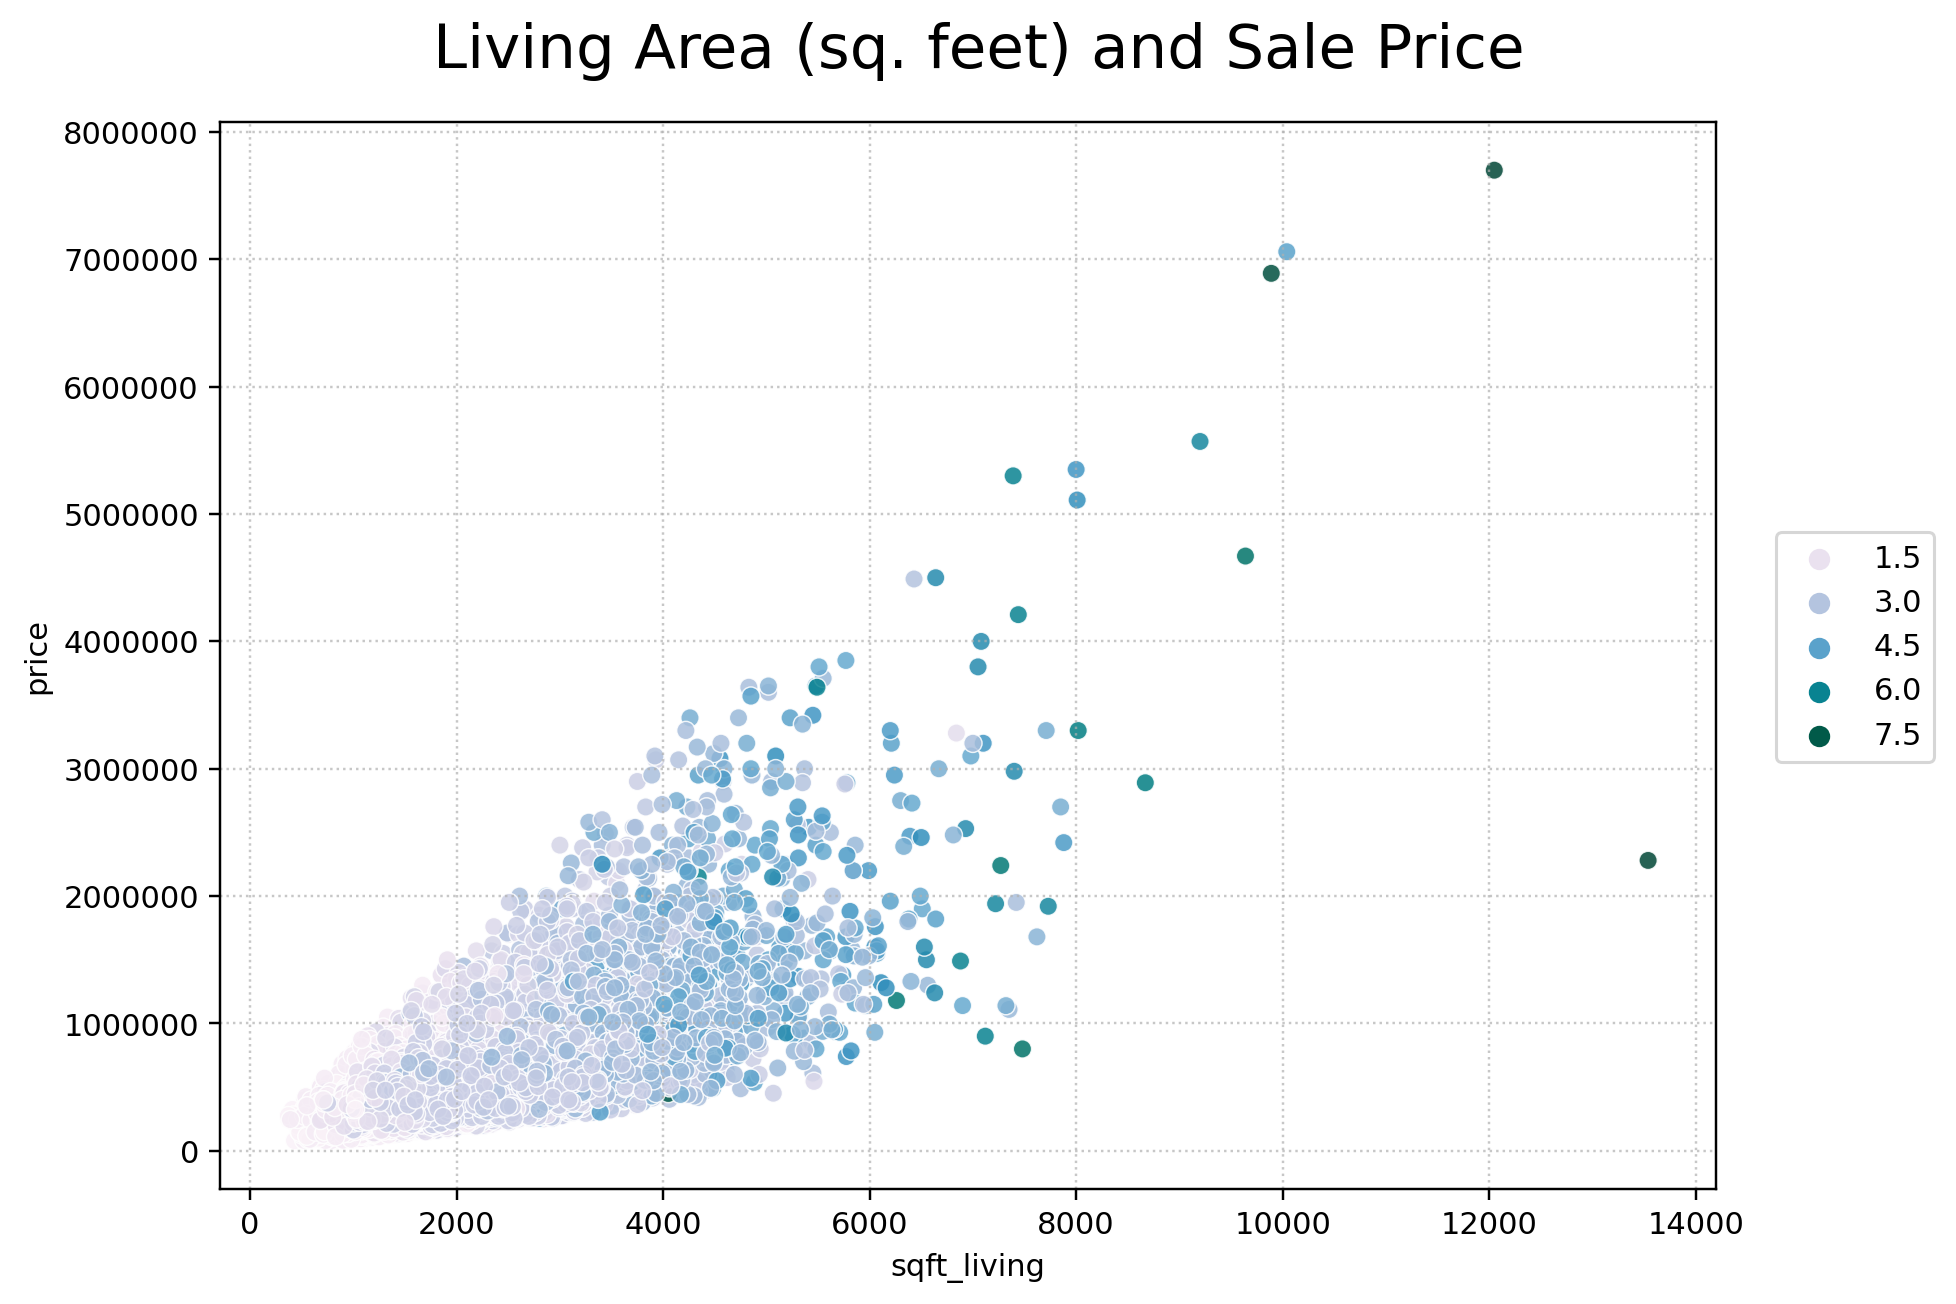

In [22]:
# scatterplots will make the relationships clearer

fig, ax = plt.subplots(figsize=(9,6), dpi=220)

sns.scatterplot(x="sqft_living", y="price", data=df,
            ax=ax, palette="PuBuGn", hue="bathrooms", alpha=0.85)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain")
# ax.axhline(y=0.5, linestyle="--", color="#DC1700", label="0.5 Correlation Coefficient")
# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

ax.legend(loc=(1.04, 0.4))
fig.suptitle("Living Area (sq. feet) and Sale Price", fontsize=20)
fig.tight_layout();

>_**Strong linear relationship** is seen between sale price and living area. This suggests **linear regression** algorithm may be a good fit for predicting sale price provided other available features also show some linear relationship._

### Exploring Location of House & Sale Price relationship
>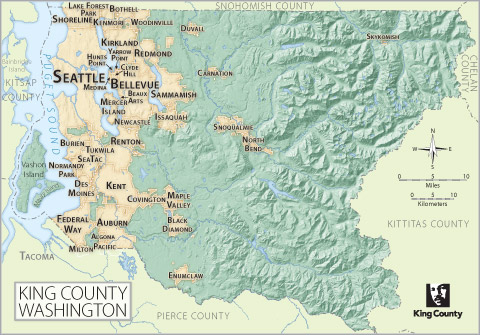\
**King County**, USA

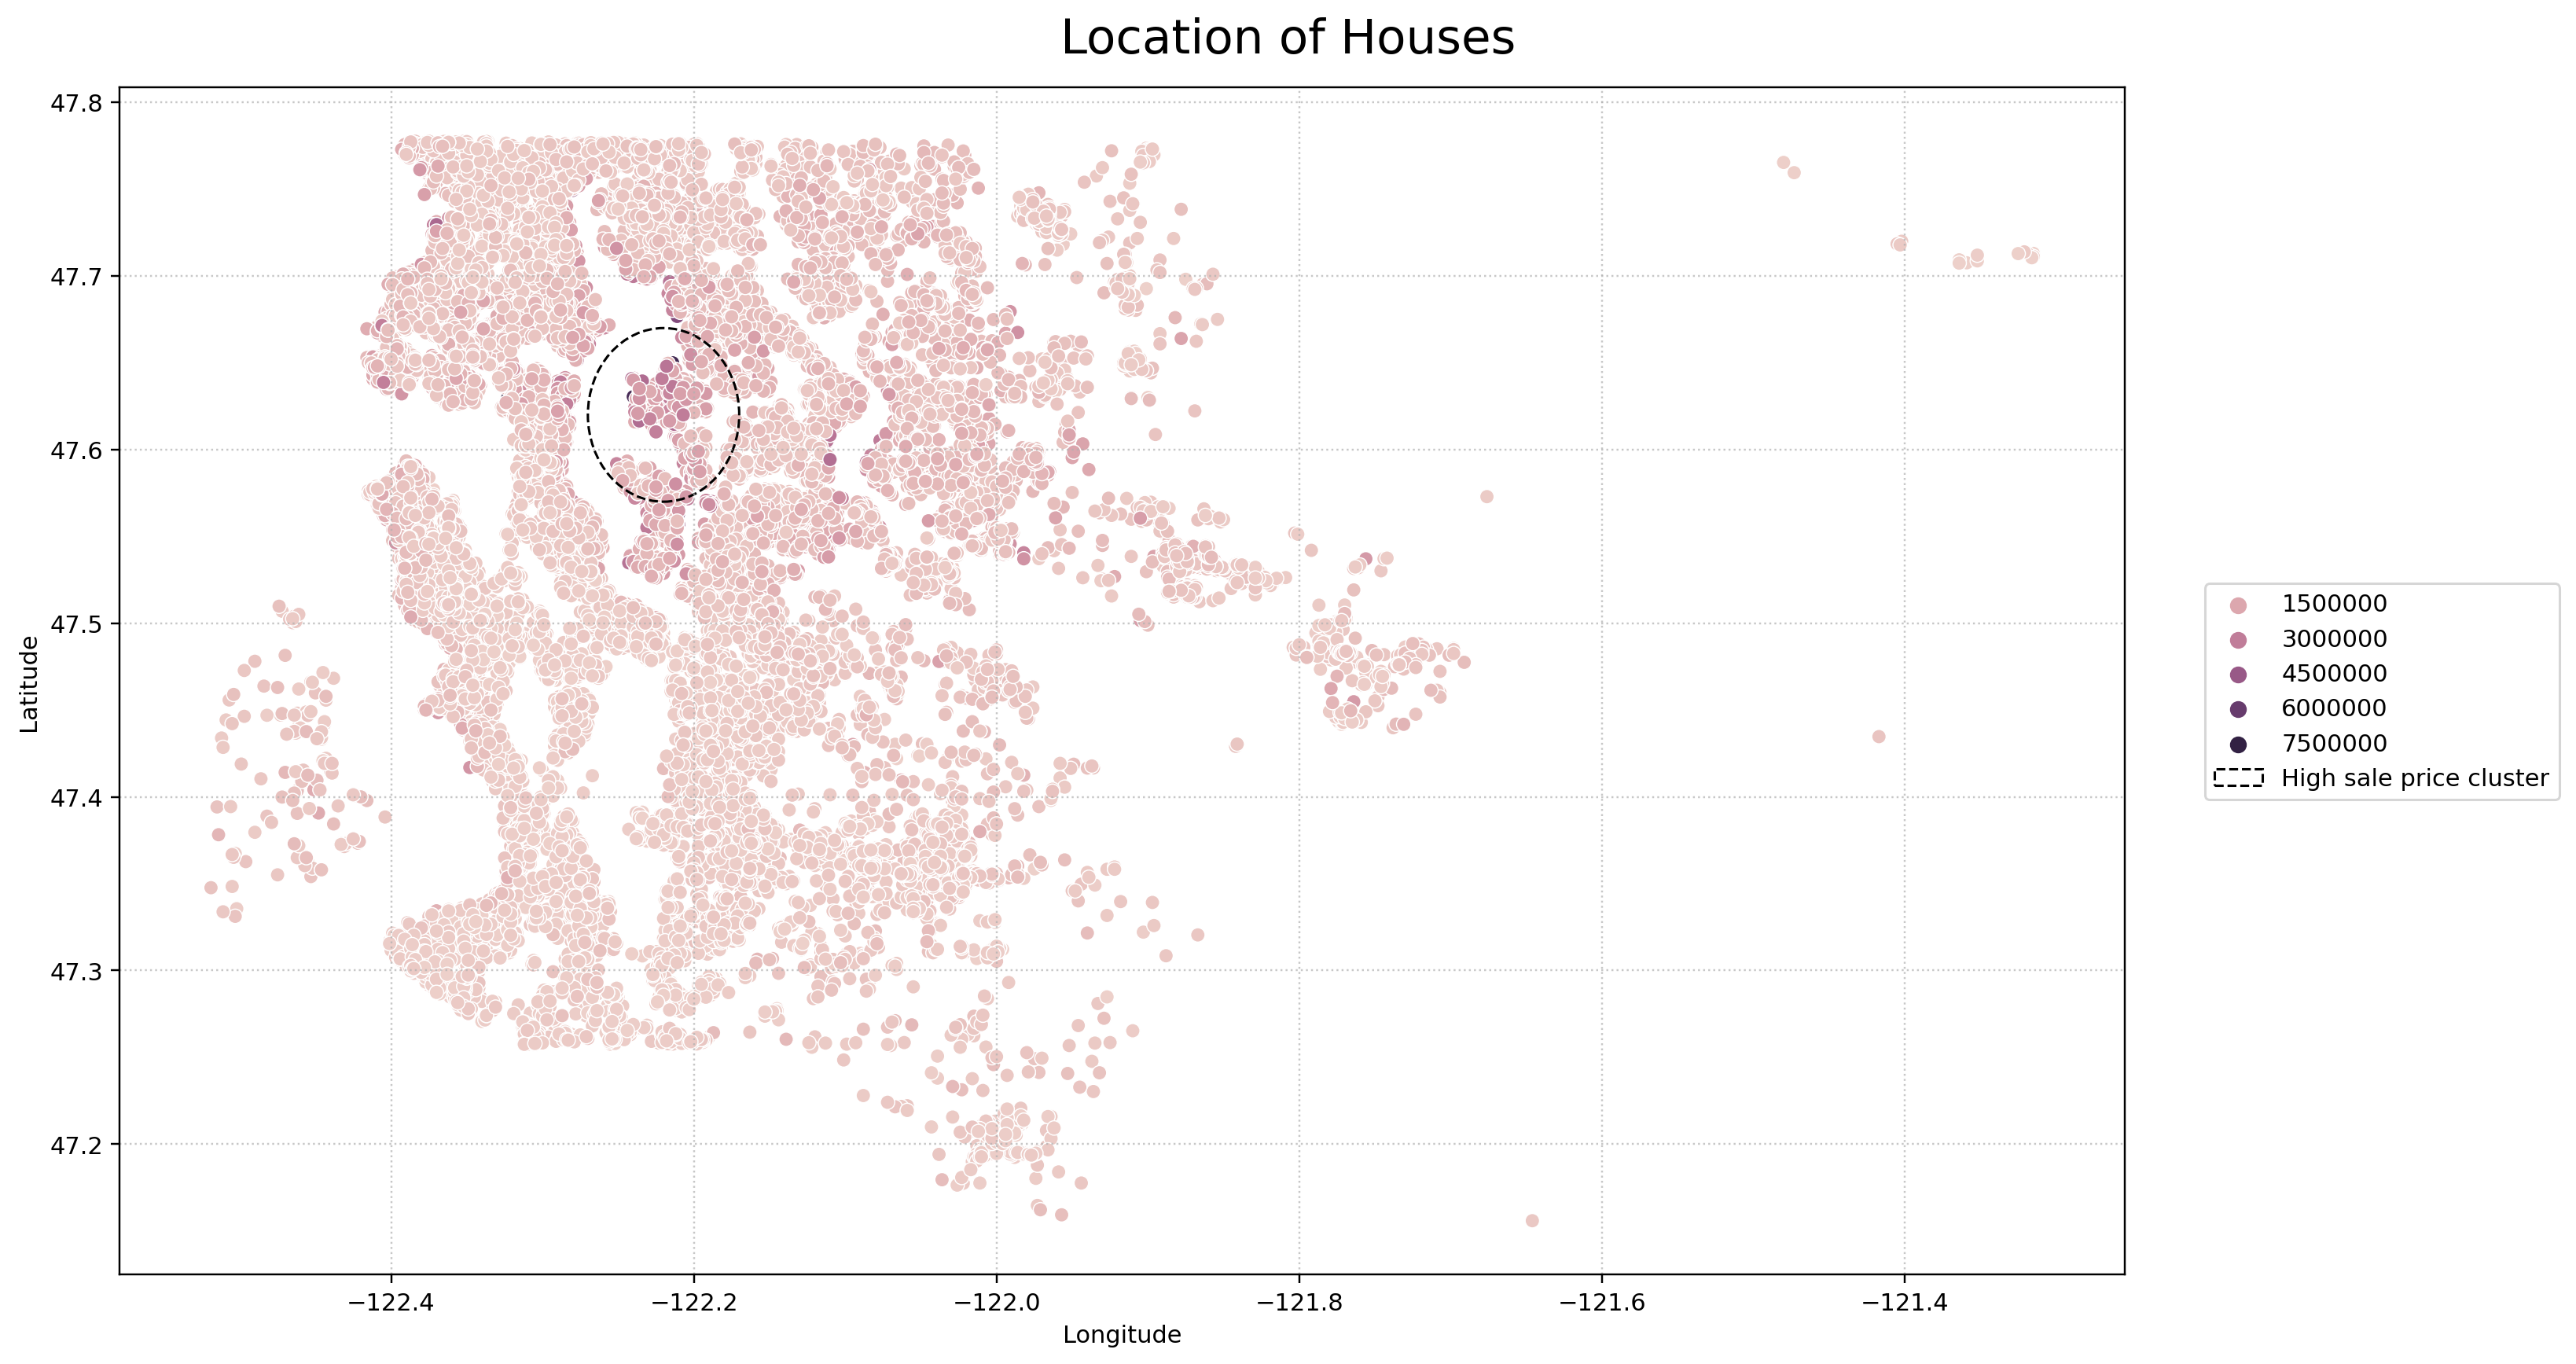

In [140]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(15,8), dpi=220)



sns.scatterplot(x="long", y="lat", data=df, hue="price",
            ax=ax, color="#B41300", alpha=1)

# cluster location
center_coordinate = (-122.22, 47.62)  # tuple (latitude, longitude or x, y)
# cluster size
circle_radius = 0.05  # radius
circle = Circle(center_coordinate, circle_radius, edgecolor='black',
                facecolor='none', linestyle='--', label="High sale price cluster")
# Add circle to the plot
ax.add_patch(circle) # alternative -> ax.add_patch(circle)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain")
# ax.axhline(y=0.5, linestyle="--", color="#DC1700", label="0.5 Correlation Coefficient")
# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc=(1.04, 0.4))
fig.suptitle("Location of Houses", fontsize=20)
fig.tight_layout();

---
>_For better visualization can **remove outliers** i.e. houses which sold for disproportionately high price relative to other houses in dataset._
---

In [24]:
# sort data by house price

df.sort_values(by="price", ascending=False)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
7245   7700000.0         6       8.00        12050     27600     2.5   
3910   7060000.0         5       4.50        10040     37325     2.0   
9245   6890000.0         6       7.75         9890     31374     2.0   
4407   5570000.0         5       5.75         9200     35069     2.0   
1446   5350000.0         5       5.00         8000     23985     2.0   
...          ...       ...        ...          ...       ...     ...   
2139     82500.0         2       1.00          520     22334     1.0   
8267     82000.0         3       1.00          860     10426     1.0   
16184    81000.0         2       1.00          730      9975     1.0   
465      80000.0         1       0.75          430      5050     1.0   
15279    78000.0         2       1.00          780     16344     1.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
7245            0     3          4     13  ...           3480      1910   
3910            1     2          3     11  ...           2360      1940   
9245            0     4          3     13  ...           1030      2001   
4407            0     0          3     13  ...           3000      2001   
1446            0     4          3     12  ...           1280      2009   
...           ...   ...        ...    ...  ...            ...       ...   
2139            0     0          2      5  ...              0      1951   
8267            0     0          3      6  ...              0      1954   
16184           0     0          1      5  ...              0      1943   
465             0     0          2      4  ...              0      1912   
15279           0     0          1      5  ...              0      1942   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
7245           1987    98102  47.6298 -122.323           3940        8800   
3910           2001    98004  47.6500 -122.214           3930       25449   
9245              0    98039  47.6305 -122.240           4540       42730   
4407              0    98039  47.6289 -122.233           3560       24345   
1446              0    98004  47.6232 -122.220           4600       21750   
...             ...      ...      ...      ...            ...         ...   
2139              0    98168  47.4799 -122.296           1572       10570   
8267              0    98146  47.4987 -122.341           1140       11250   
16184             0    98168  47.4808 -122.315            860        9000   
465               0    98014  47.6499 -121.909           1200        7500   
15279             0    98168  47.4739 -122.280           1700       10387   

       year_sold  age  
7245        2014  104  
3910        2014   74  
9245        2014   13  
4407        2014   13  
1446        2015    6  
...          ...  ...  
2139        2014   63  
8267        2014   60  
16184       2015   72  
465         2014  102  
15279       2014   72  

[21597 rows x 21 columns]

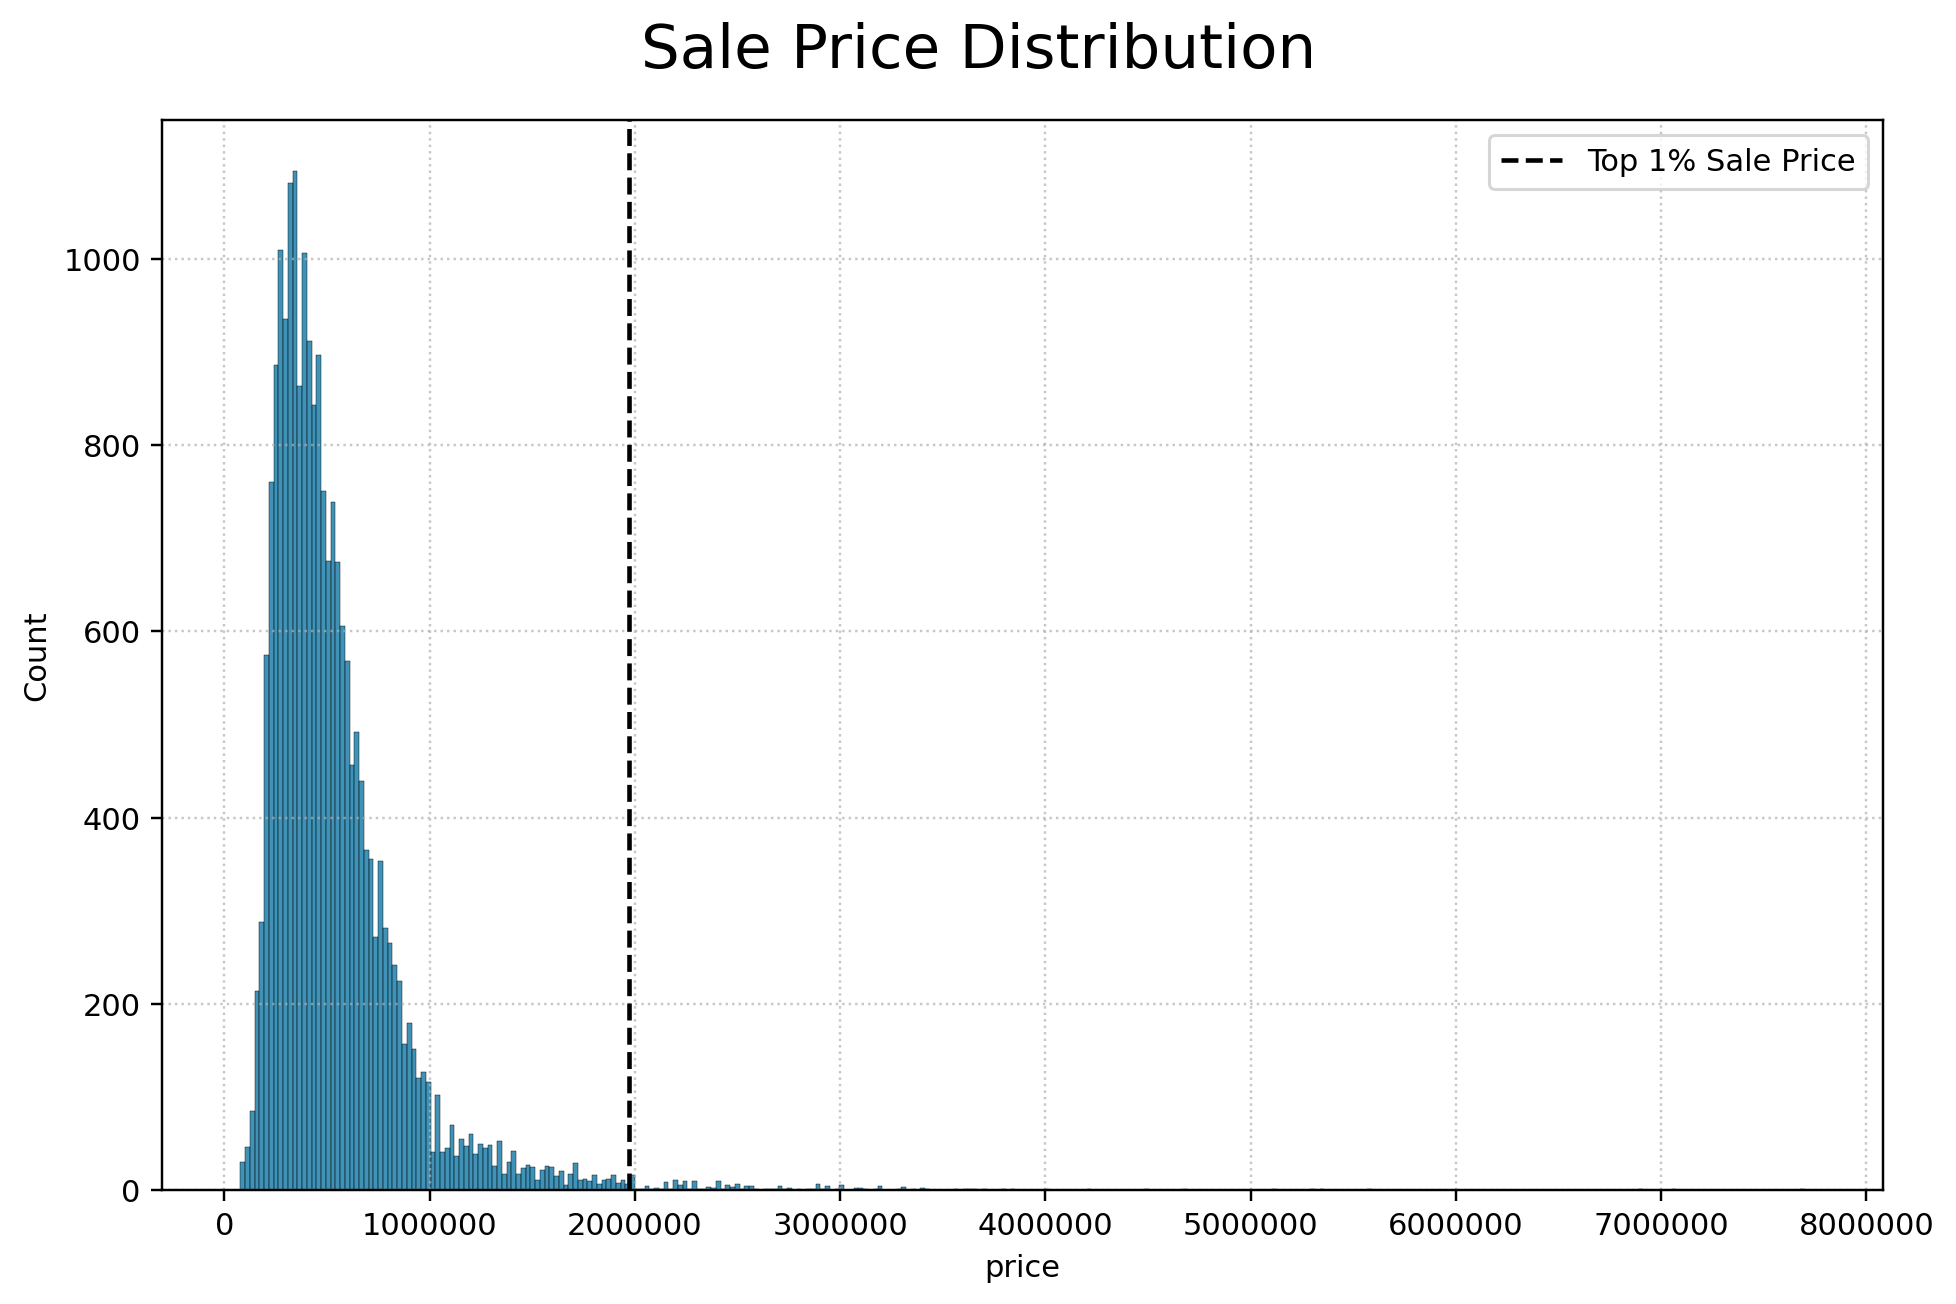

In [25]:
fig, ax = plt.subplots(figsize=(9,6), dpi=220)

sns.histplot(x="price", data=df, ax=ax, color="#006E9F")

top_1percent = df["price"].quantile(0.99)
ax.axvline(x=top_1percent, linestyle="--", color="black",
          label="Top 1% Sale Price")
ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain")
ax.legend(loc="best")
fig.suptitle("Sale Price Distribution", fontsize=20)
fig.tight_layout();

>_Removing the top 1% houses by sale price may make the dataset less skewed._

In [26]:
# no. of houses in top 1%
len(df.index)*0.01

215.97

In [27]:
# 99% houses (Top 1% houses by price removed)
df_99percent = df.sort_values(by="price", ascending=False).tail(len(df) - 216)

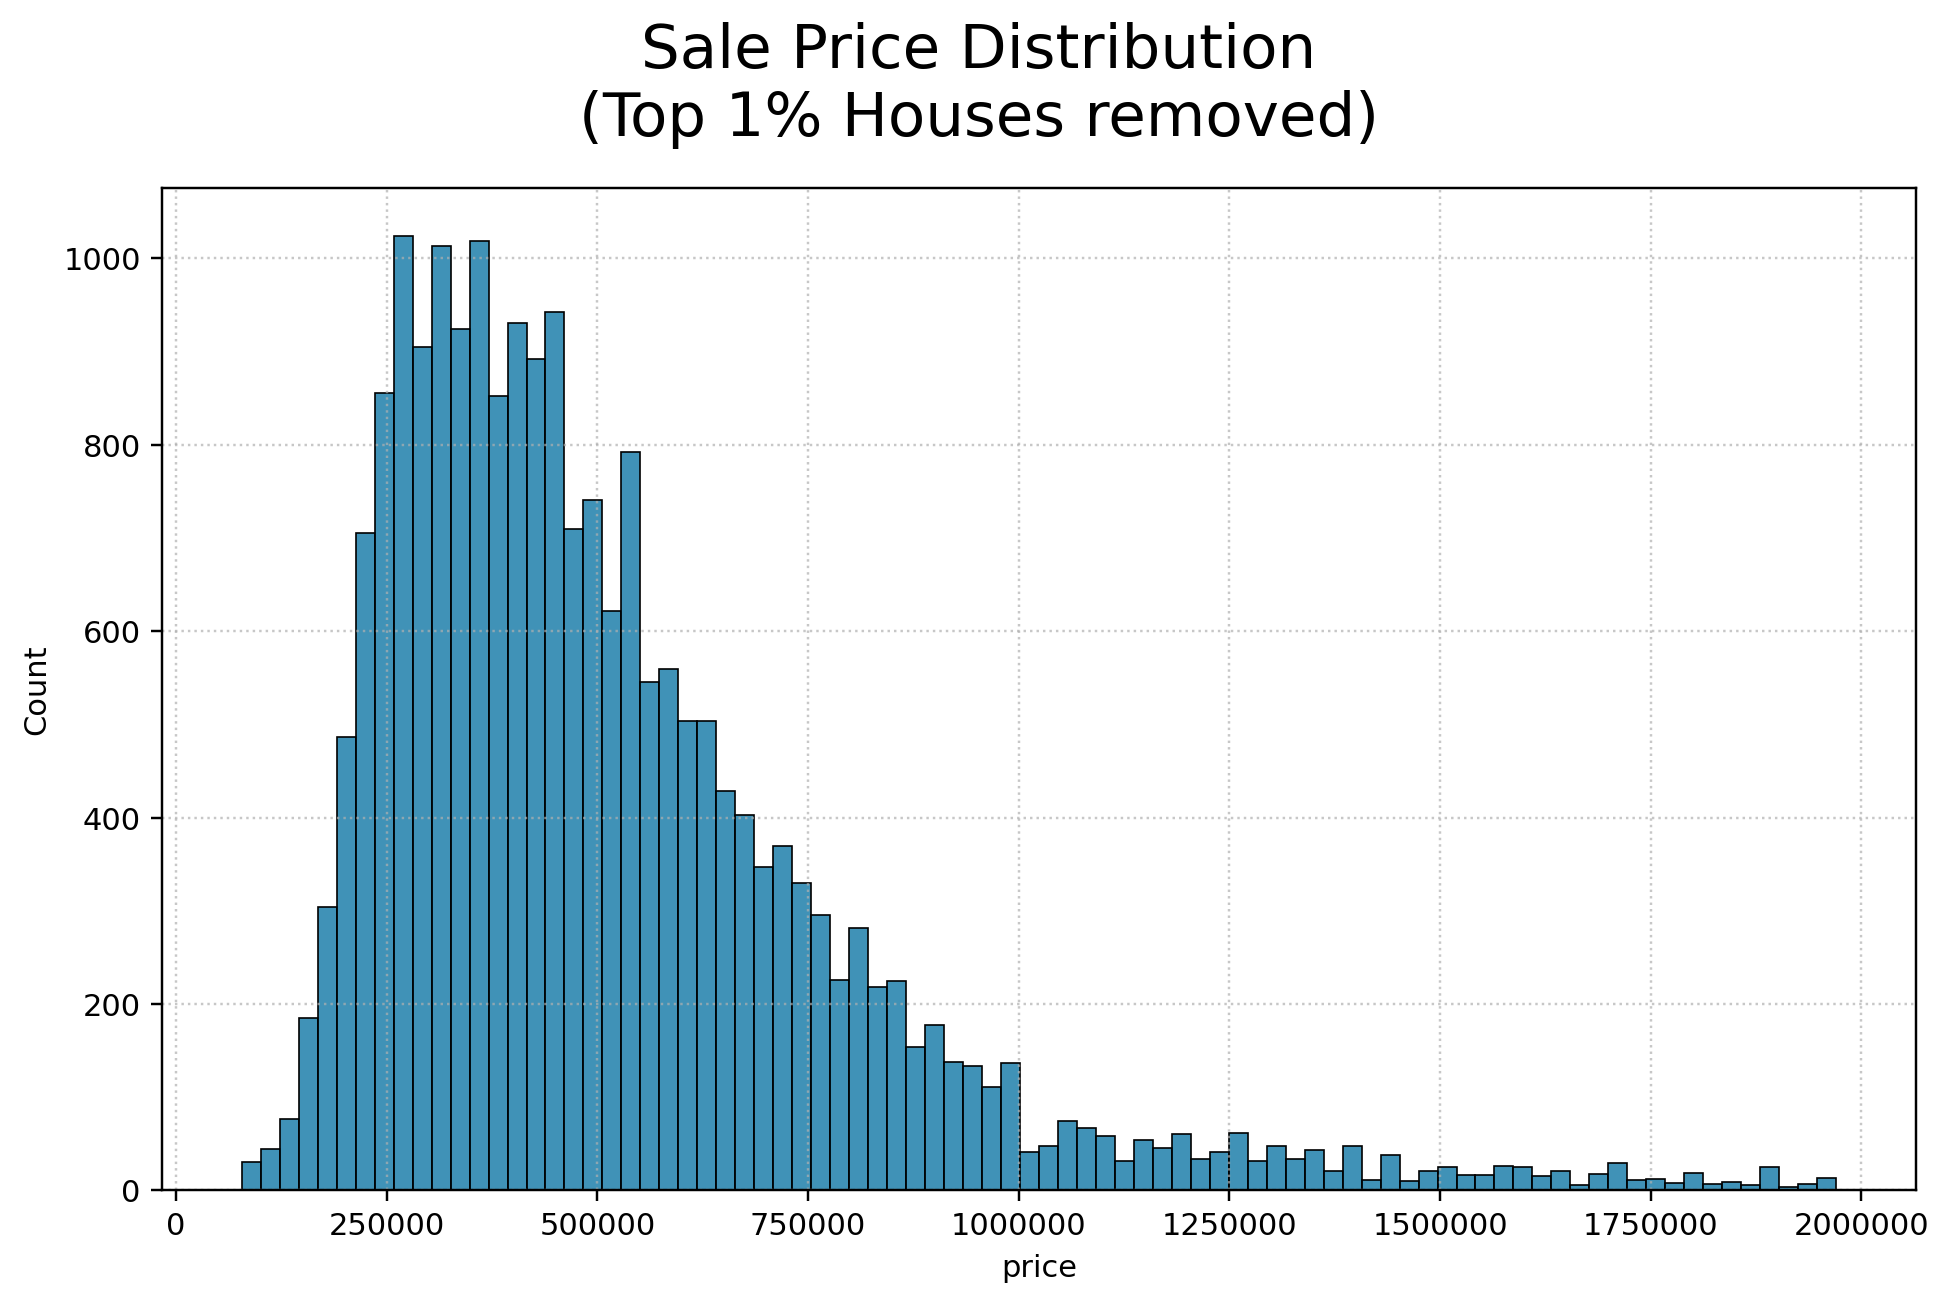

In [28]:
fig, ax = plt.subplots(figsize=(9,6), dpi=220)

sns.histplot(x="price", data=df_99percent, ax=ax, color="#006E9F")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain")
# ax.legend(loc="best")
fig.suptitle("Sale Price Distribution\n(Top 1% Houses removed)", fontsize=20)
fig.tight_layout();

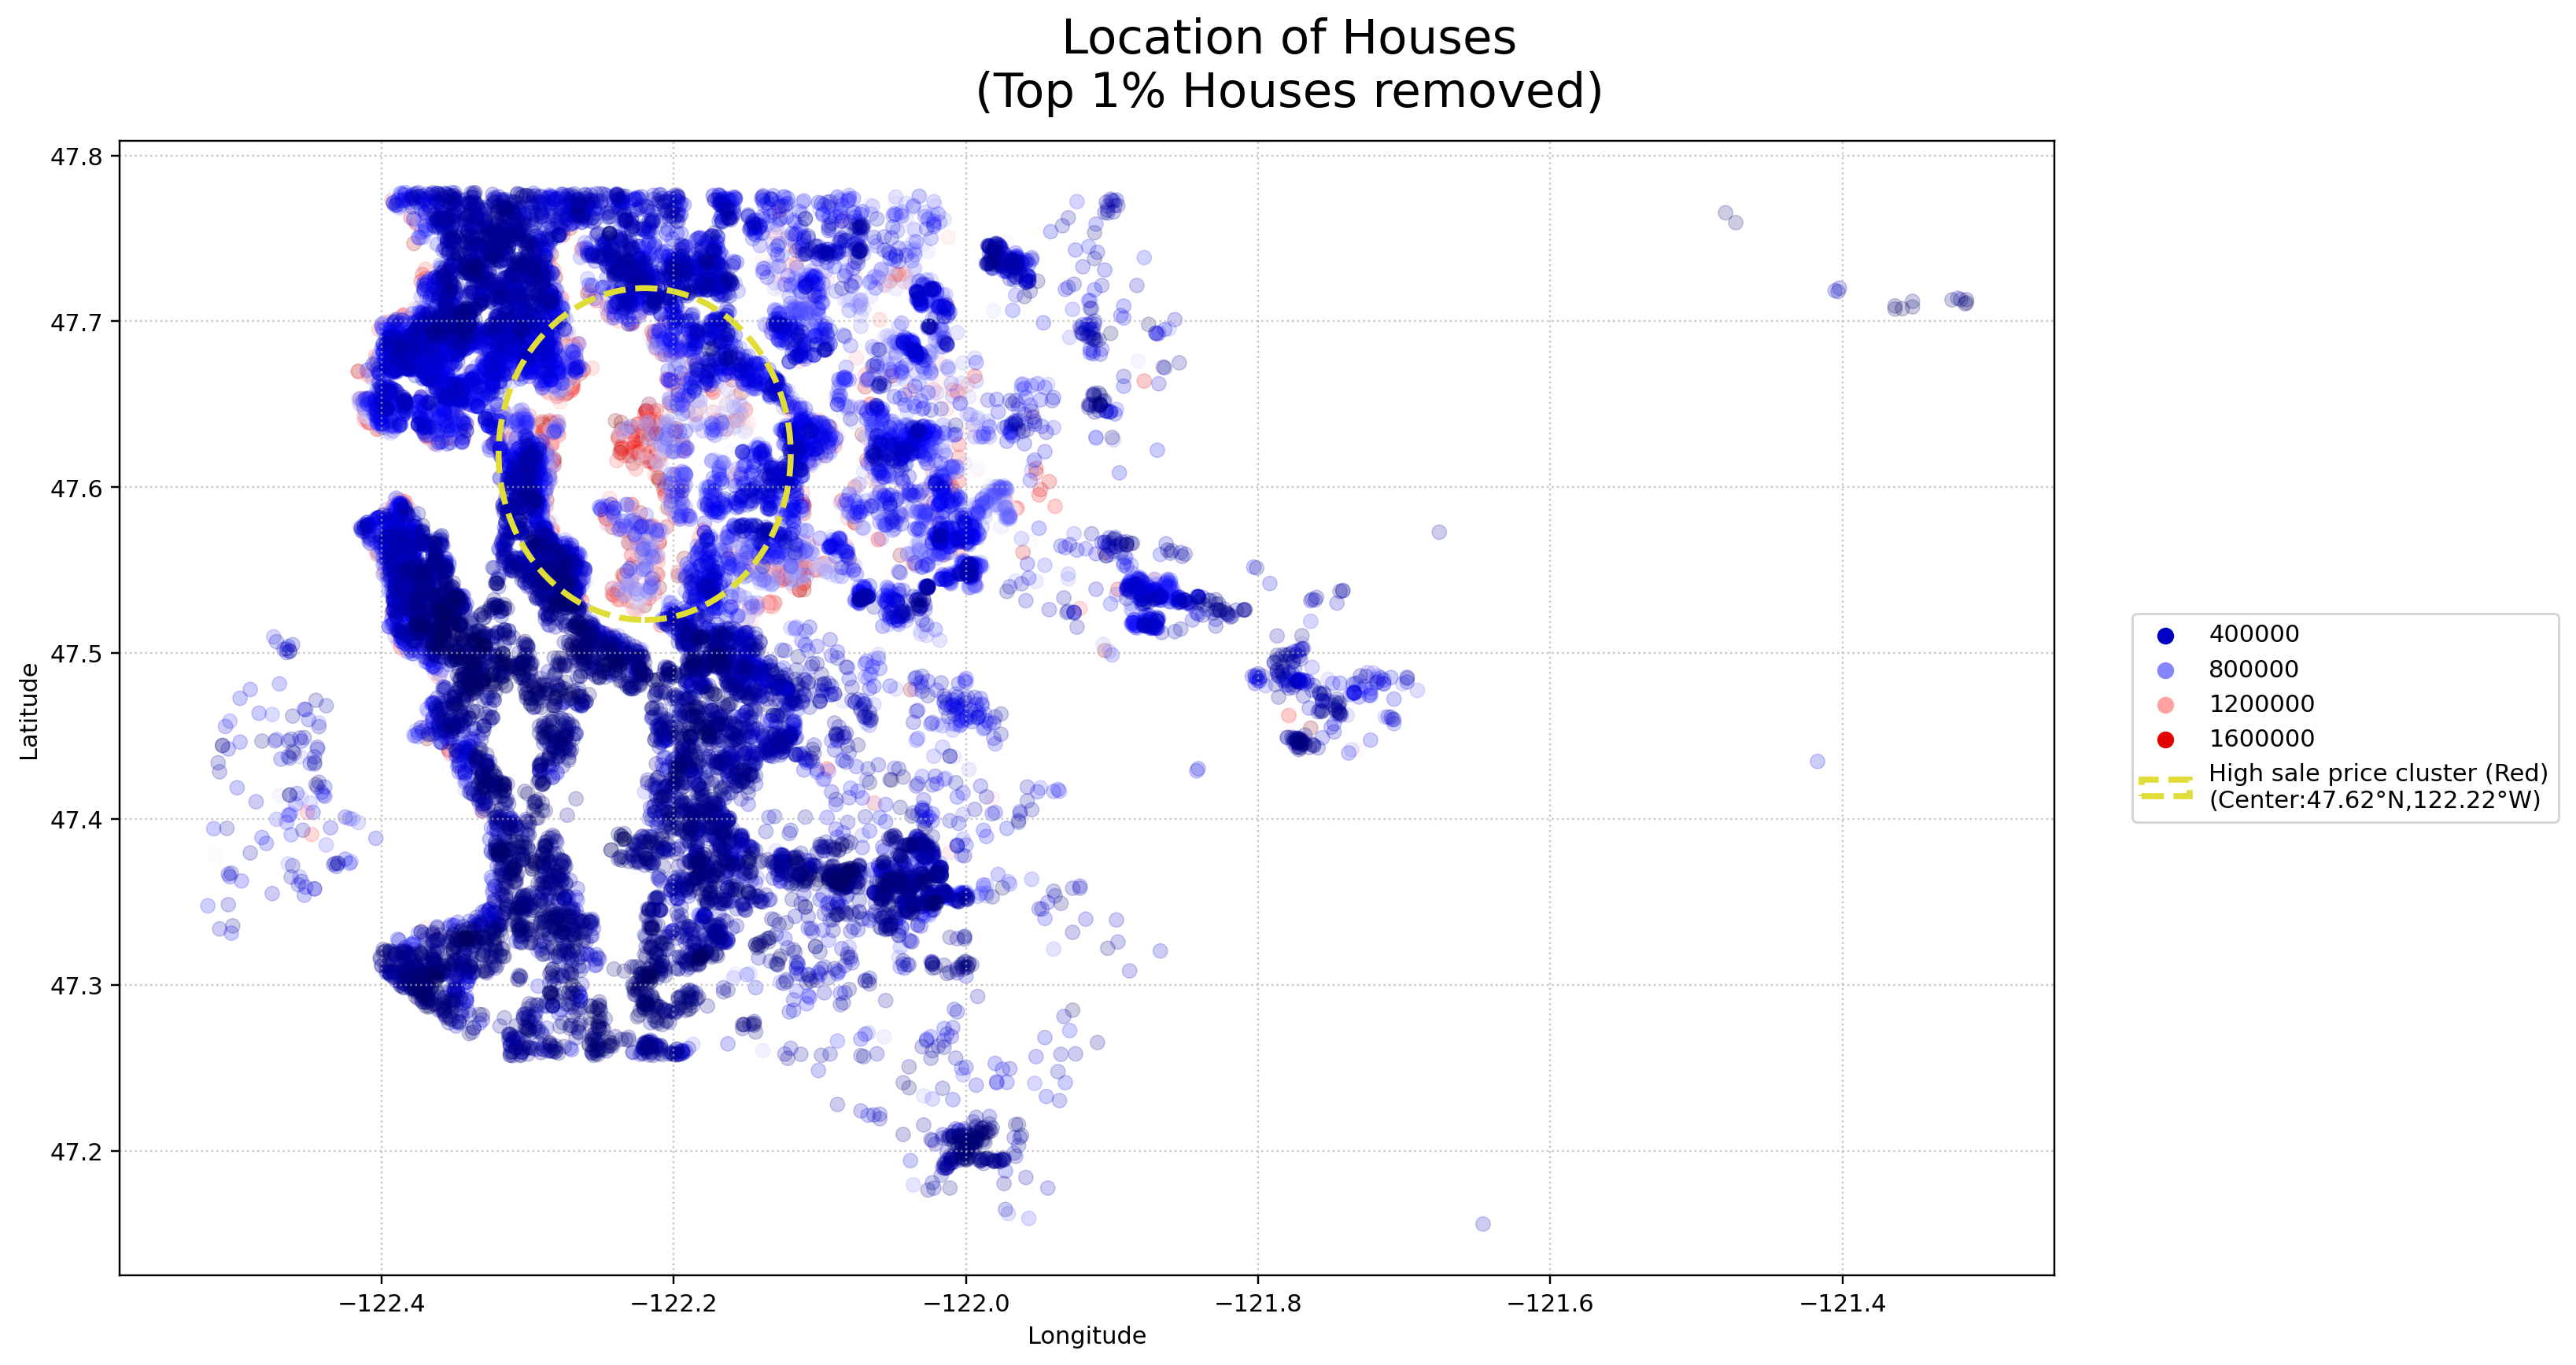

In [29]:
fig, ax = plt.subplots(figsize=(15,8), dpi=220)

sns.scatterplot(x="long", y="lat", data=df_99percent, hue="price",
            ax=ax, palette="seismic", alpha=0.2, edgecolor=None)

center_coordinate = (-122.22, 47.62)  # Replace with your coordinate (latitude, longitude or x, y)
circle_radius = 0.1  # Replace with your desired circle radius
# ax.scatter(*center_coordinate, color='black', label='Cluster')  # Plot center coordinate
circle = Circle(center_coordinate, circle_radius, edgecolor="#E0DD37",
                facecolor='none', linestyle='--', label="High sale price cluster (Red)\n(Center:47.62°N,122.22°W)",
               linewidth=2.5)
# Add circle to the plot
plt.gca().add_patch(circle)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.ticklabel_format(axis="both", style="plain")
# ax.axhline(y=0.5, linestyle="--", color="#DC1700", label="0.5 Correlation Coefficient")
# median_bathrooms = df["bathrooms"].median()
# ax.axvline(x=median_bathrooms, label="Median no. of Bathrooms",
#           color="#CE5F47")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc=(1.04, 0.4))
fig.suptitle("Location of Houses\n(Top 1% Houses removed)", fontsize=20)
fig.tight_layout();

>_Above plot reveals that locations **in and around Seattle** are **specially expensive** whereas at the **outskirts** house prices are **more affordable**._
>>_**Location of Seattle** $\rightarrow$ 47.6061° N, 122.3328° W\
**Location of Cluster's center** $\rightarrow$ 47.62° N, 122.22° W_

---

_Now we will perform Feature Engineering to create new relevant features out of available ones, while getting rid of features which may not be very helpful in training a Neural Network to predict house prices._

---

# Feature Engineering & Further Analysis

In [30]:
# check dataframe and available features

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  age  
0    98178  47.5112 -122.257           1340        5650       2014   59  
1    98125  47.7210 -122.319           1690        7639       2014   63  
2    98028  47.7379 -122.233           2720        8062       2015   82  
3    98136  47.5208 -122.393           1360        5000       2014   49  
4    98074  47.6168 -122.045           1800        7503       2015   28  

[5 rows x 21 columns]

In [31]:
# features
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'age'],
      dtype='object')

In [32]:
# load again as dataframe

df = pd.read_csv(filepath)

In [33]:
# drop id column
df = df.drop(columns="id")

### Create separate column for Year & Month of Sale

In [34]:
# convert date feature to extract year and month

# convert into datetime object
df["date"] = pd.to_datetime(df["date"])

# create new column by extracting year of sale
df["year_sold"] = df["date"].apply(func=lambda date: date.year)
# create new column by extracting month of sale
df["month_sold"] = df["date"].apply(func=lambda date: date.month)

In [35]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  month_sold  
0    98178  47.5112 -122.257           1340        5650       2014          10  
1    98125  47.7210 -122.319           1690        7639       2014          12  
2    98028  47.7379 -122.233           2720        8062       2015           2  
3    98136  47.5208 -122.393           1360        5000       2014          12  
4    98074  47.6168 -122.045           1800        7503       2015           2  

[5 rows x 22 columns]

In [36]:
# don't need date column anymore
df = df.drop(columns="date")

### Check if interesting patterns emerge from year & month of sale

In [37]:
df["year_sold"].unique()

array([2014, 2015], dtype=int64)

In [38]:
df["month_sold"].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9], dtype=int64)

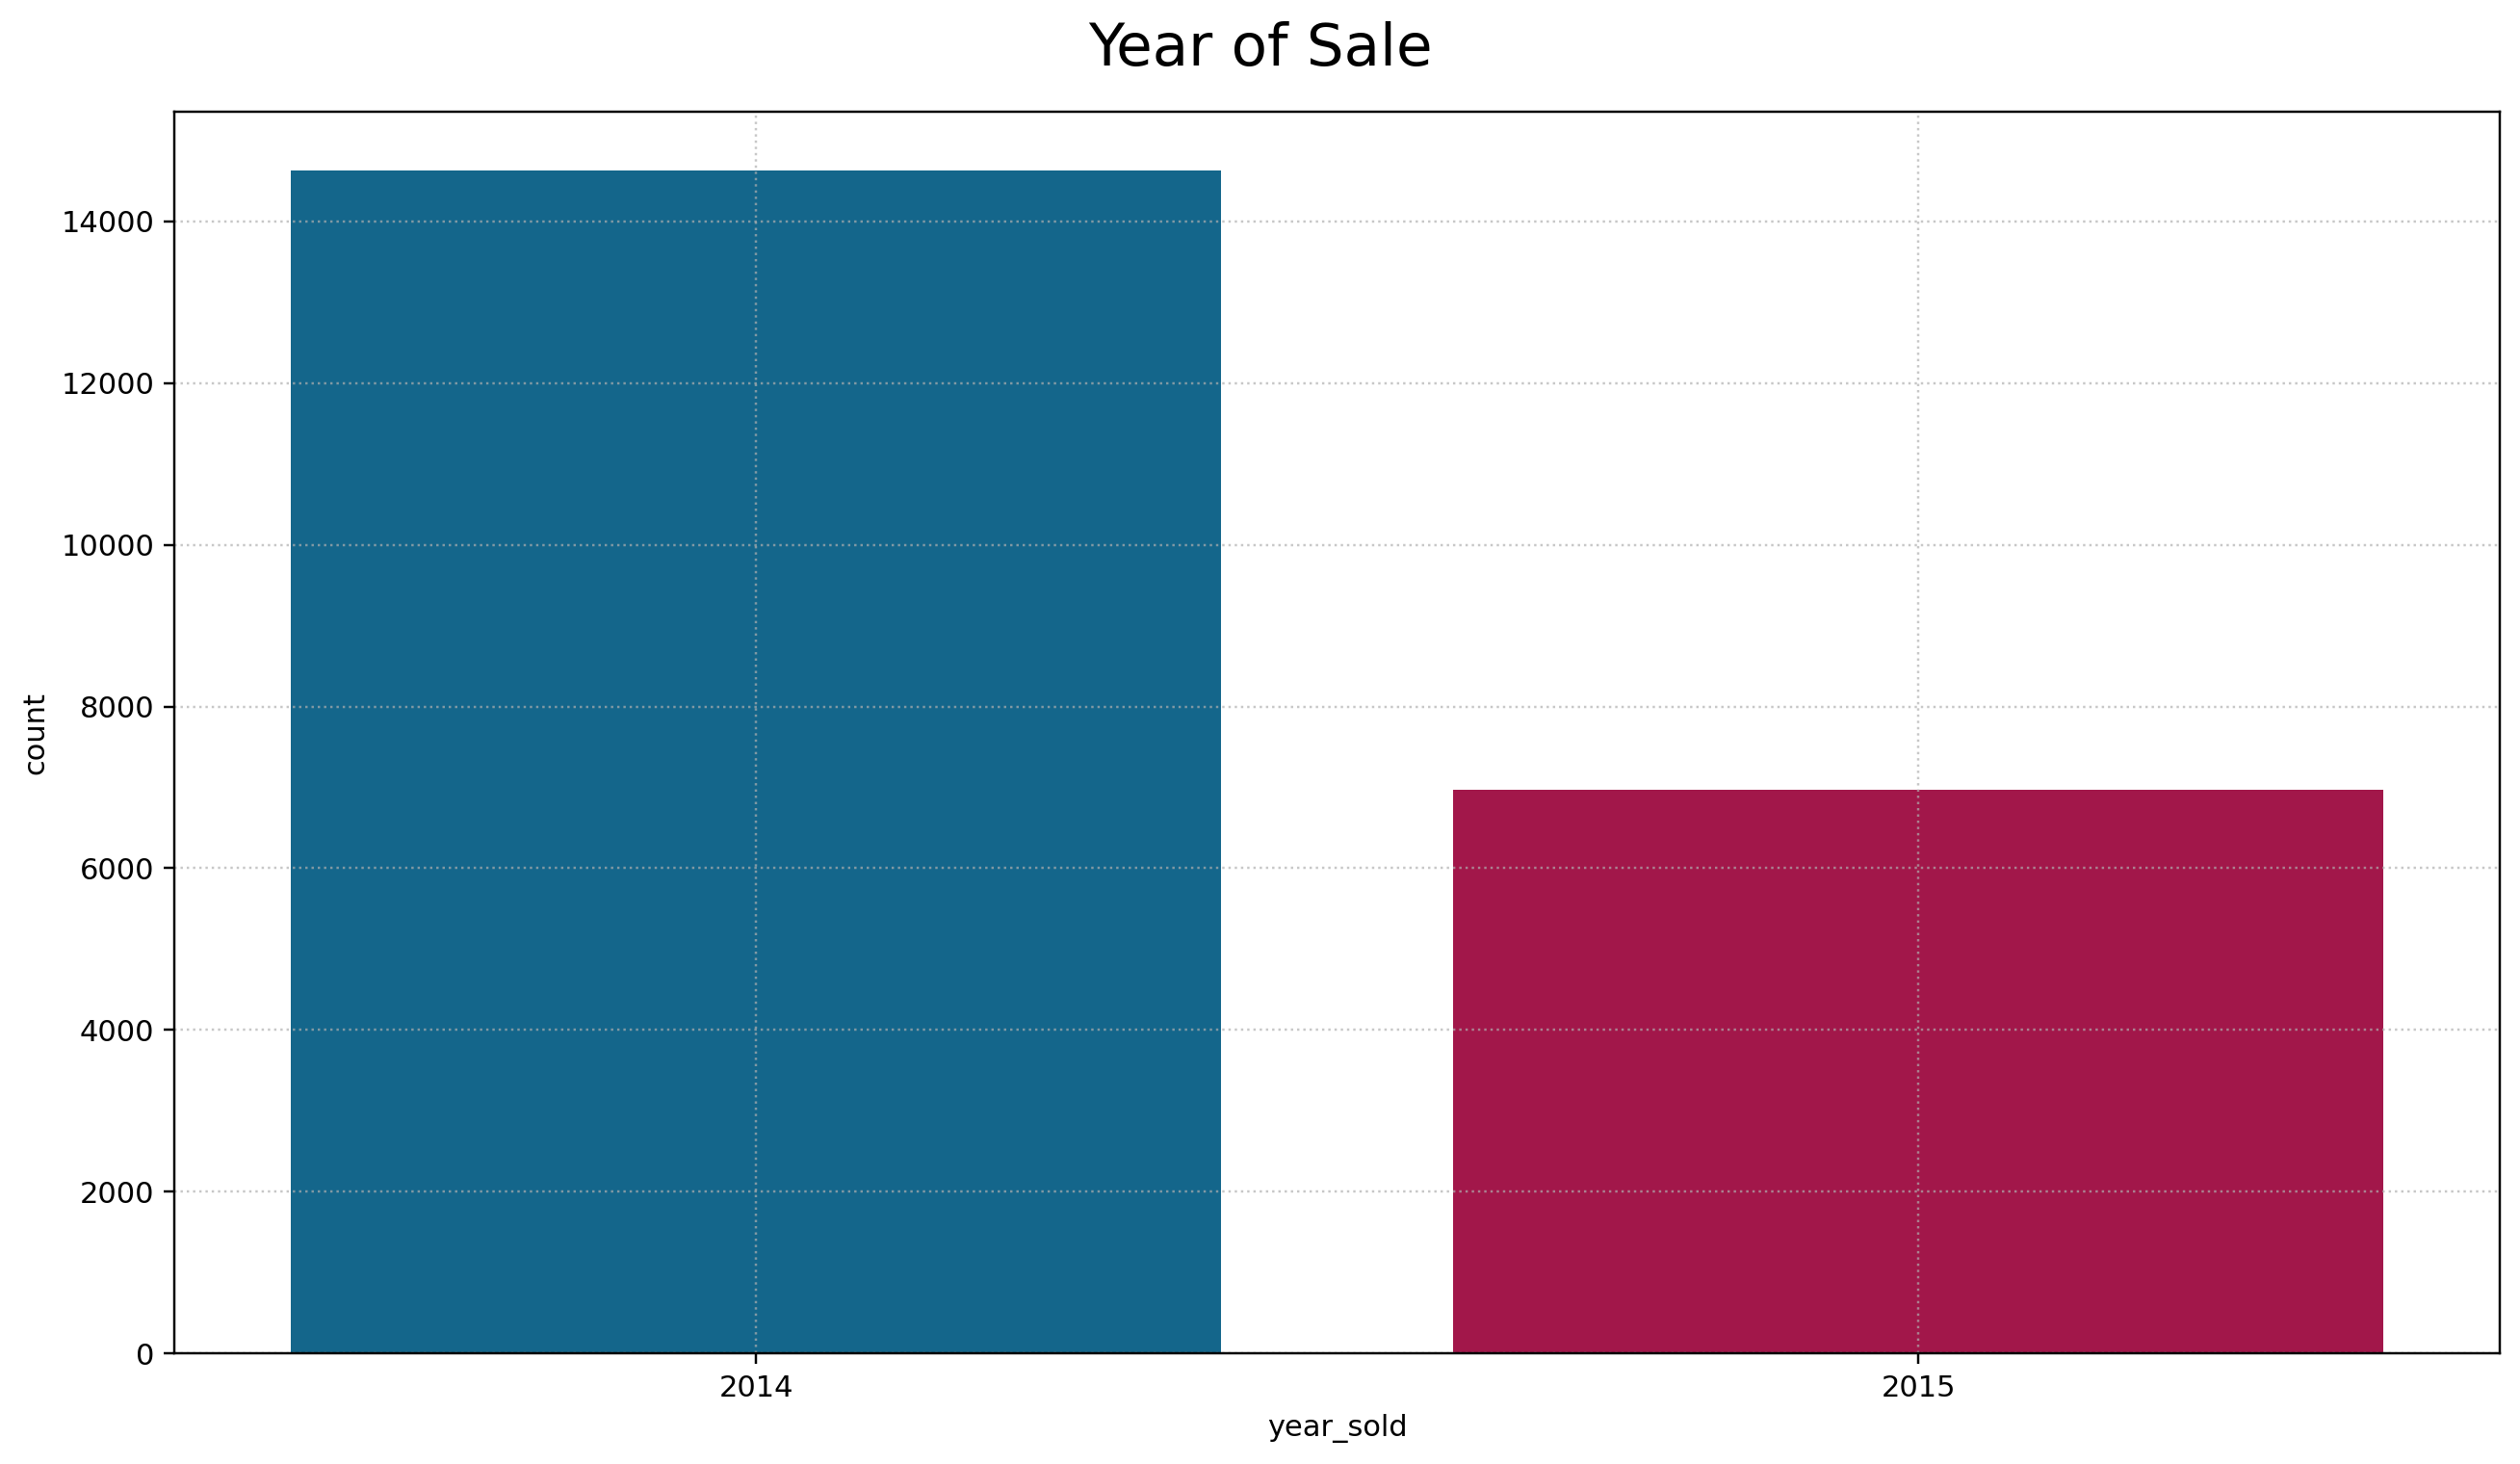

In [39]:
fig, ax = plt.subplots(figsize=(12,7), dpi=220)

sns.countplot(x="year_sold", data=df, ax=ax,
              palette={2014:"#006E9F", 2015:"#B90044"})

# sns.countplot(x="month_sold", data=df, ax=ax,
#               hue="year_sold", palette="YlGnBu")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
fig.suptitle("Year of Sale", fontsize=20)
fig.tight_layout();

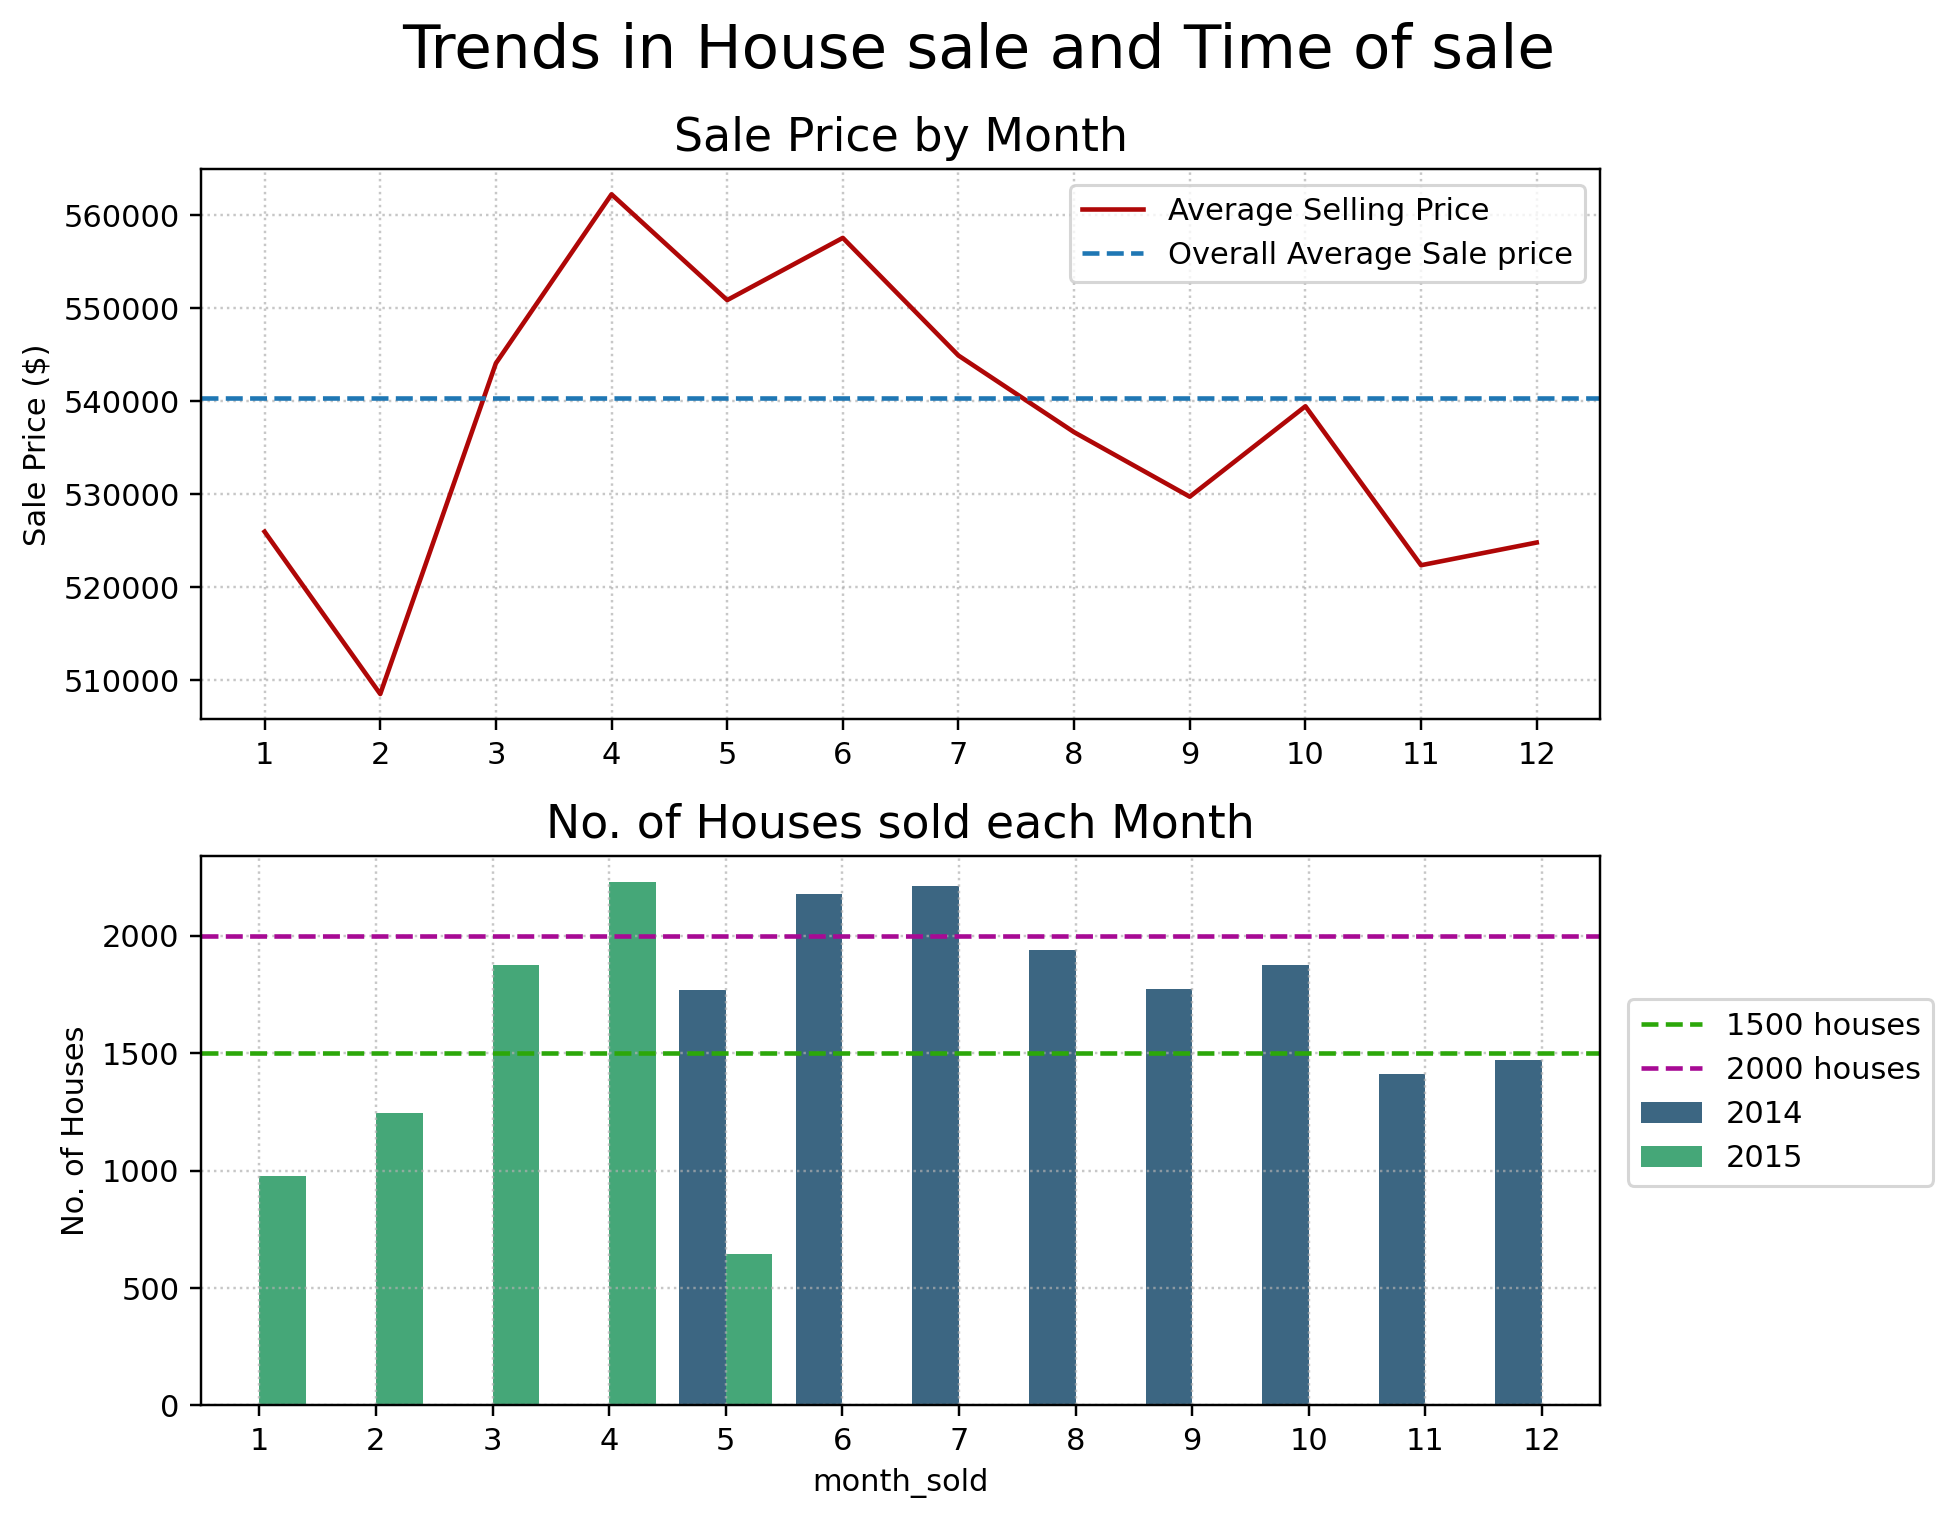

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7), dpi=220)
ax1, ax2 = ax

# house price & month
yVals = df.groupby("month_sold").mean()["price"]
xVals = range(1,13)

ax1.plot(xVals, yVals, color="#AF0707",
       label="Average Selling Price")

# month of sale and no. of houses

sns.countplot(x="month_sold", data=df, hue="year_sold",
             palette="viridis", ax=ax2)

# sns.countplot(x="month_sold", data=df, ax=ax,
#               hue="year_sold", palette="YlGnBu")

ax1.set_xticks(xVals)
ax1.set_ylabel("Sale Price ($)")
ax2.set_ylabel("No. of Houses")
ax1.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax2.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax1.set_title("Sale Price by Month", fontsize=15)
ax2.set_title("No. of Houses sold each Month", fontsize=15)

ax1.axhline(y=df["price"].mean(), linestyle="--", label="Overall Average Sale price")
ax2.axhline(y=1500, label="1500 houses", color="#2CA70A", linestyle="--")
ax2.axhline(y=2000, label="2000 houses", color="#A70A94", linestyle="--")
ax2.legend(loc=(1.02, 0.4))
ax1.legend(loc="best")
fig.suptitle("Trends in House sale and Time of sale", fontsize=20)
fig.tight_layout();

>1._Highest no. of houses ($>2000$) were sold in months of **April, June, July**._
>2. _From **March to July-August**, houses sold for **above average prices**._
>>_Both the above trends reveal that **March to July** typically had **higher demand** for houses compared to no. of sellers._

>3._No. of houses sold in year 2014 = $\approx 2x$ Houses sold in year 2015 in this dataset._

In [41]:
# check remaining columns

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold'],
      dtype='object')

In [44]:
# check zipcode feature
len(df["zipcode"].unique())

70

---
>_There are 70 different zipcodes available. Even if there is some ordered relationship among them (say, houses at one location being more expensive than other) working with 70 different features by converting them into categories (integer encoding) may become unweildy._
>>_Better remove the `zipcode` feature._
---

In [45]:
# remove zipcode feature
df = df.drop(columns="zipcode")

In [46]:
# year renovated feature
df["yr_renovated"].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

---
>_If a house has been **renovated recently** then it is likely to have relatively **higher value** (hence higher sale price).\
Since higher value of this feature (i.e. a recent year) means more value, there is a **hierarchical ordering** present._
>>_Better keep this feature untouched and allow the Neural Network to learn the relationship._
---

---
>_Now that we have explored the dataset and created new features while dropping some (Feature Engineering section), we can move on to building a Neural Network (NN) model._

>_Before that though, the dataset needs to be processed for making it suitable for training the NN model._
---

# Preparing the Data for Building a Neural Network Model

## Separating Input features & Target variable

In [47]:
# input features
X = df.drop(columns="price")

# target variable
y = df["price"]

In [52]:
# convert into Numpy Arrays for feeding the NN
X = np.array(X).reshape(-1, 19) # 2D Numpy array
y = np.array(y) # 1D Numpy array

In [54]:
print(f"There are {X.shape[0]} Examples and {X.shape[1]} Input Features.")

There are 21597 Examples and 19 Input Features.


## Creating Training & Testing sets
>_Since dataset is large enough will allocate **$70\%$ data for Training** and **$30\%$ data for Testing** NN model performance._

In [55]:
# for splitting the data
from sklearn.model_selection import train_test_split

In [56]:
# training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=0)

## Scaling the Data to make values comparable
1. Will use **Min-Max scaling** since **extreme outlier houses have been removed** while EDA and cleaning the data.
    - will scale the values to range $from\;0\;to\;1$

**Min-Max Scaling** method $\rightarrow$
$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

$$X_{min} = Minimum\;value\;of\;that\;feature$$
$$X_{max} = Maximum\;value\;of\;that\;feature$$

In [57]:
# for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [58]:
# scaler instance
scaler = MinMaxScaler()

In [59]:
# fit and transform Training set
X_train_scaled = scaler.fit_transform(X_train)

In [60]:
# transform the Test set using same rules as learnt from Training set
X_test_scaled = scaler.transform(X_test)

#### NOTE
1. **Test set** is scaled using **same rules** as that of Training set
    - helps avaoid **data leakage** $\rightarrow$ NN Model does not need to take a peek at the Test set until it is time to make predictions and evaluating its performance (_after training stage_).
    ---

>_Now that data has been split into appropriate sets for training & testing, we may go ahead with building the actual Neural Network model._
---

# Building a Neural Network Model

In [81]:
# for building the Dense NN architecture 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [82]:
# check no. of features to decide input shape while feeding the NN
input_shape = X_train_scaled.shape[1]
print(f"Input shape for the NN = {input_shape}")

# convert into a tuple for integrating with NN
input_shape = (input_shape,)

Input shape for the NN = 19


In [83]:
# base Sequential model
model = Sequential()

In [84]:
# building the NN architecture one layer at a time

# input layer
model.add(Dense(units=19, activation="relu",
                input_shape=input_shape, name="layer1"))

# hidden layers
model.add(Dense(units=19, activation="relu", name="layer2"))
model.add(Dense(units=19, activation="relu", name="layer3"))
model.add(Dense(units=19, activation="relu", name="layer4"))

# output layer
model.add(Dense(units=1, activation=None, name="layer5"))

## Compiling the NN Model
>_Will **configure** the NN model for training stage._
>_Following aspects will be configured $\rightarrow$_
>1. **Optimization process** to be used while training
>2. How the model **evaluates** will evaluate own performance during training
>3. The **Loss function** which is to be minimized while training
---

In [85]:
# compile model
model.compile(optimizer="adam", loss="mean_squared_error")

# Training the Neural Network Model
1. Will use **Test set** for **evaluating** model's performance after **each training epoch/iteration** and updation of weights of the model.
    - won't affect training process since Test set will not be used for training
    ---
2. Since dataset is large enough, will increase the **batch size** for relatively faster training (_default size is 32 examples_)
---
#### NOTE: Batches & Epochs
1. **Epoch**
    - Total iterations over **entire training set** _i.e. NN goes through entire training set once in a single epoch_
    ---
2. **Batch size**
    - No. of examples considered for each step of updating weights
        - Keras considers dataset in chunks/batches to make training faster & optimized
        - **One epoch has multiple steps of gradient/weight updates** since NN needs to go through entire training set

>_Example,\
**Training Dataset** has **1000 samples**\
**Batch size** = **50** samples\
**Epochs** = **100** \
Since batch size is 50 and there are 1000 samples,\
model will take **1000/50 steps** to go through **entire dataset once**.\
i.e. For **one epoch, weights are updated 20 times** by considering the\
dataset of 1000 examples in batches/chunks of 50 examples._

In [86]:
# fit the scaled training set
model.fit(x=X_train_scaled, y=y_train,
         validation_data=(X_test_scaled, y_test),
         batch_size=128, epochs=400)

Epoch 1/400
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001B9F22FC180>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001B9F22FC180>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. 

119/119 [==============================] - 0s 2ms/step - loss: 34148501504.0000 - val_loss: 29452765184.0000
Epoch 110/400
119/119 [==============================] - 0s 2ms/step - loss: 34077687808.0000 - val_loss: 29452781568.0000
Epoch 111/400
119/119 [==============================] - 0s 2ms/step - loss: 34045569024.0000 - val_loss: 29346547712.0000
Epoch 112/400
119/119 [==============================] - 0s 2ms/step - loss: 33974294528.0000 - val_loss: 29294813184.0000
Epoch 113/400
119/119 [==============================] - 0s 2ms/step - loss: 33904291840.0000 - val_loss: 29248010240.0000
Epoch 114/400
119/119 [==============================] - 0s 2ms/step - loss: 33865338880.0000 - val_loss: 29234550784.0000
Epoch 115/400
119/119 [==============================] - 0s 2ms/step - loss: 33838125056.0000 - val_loss: 29229836288.0000
Epoch 116/400
119/119 [==============================] - 0s 2ms/step - loss: 33778102272.0000 - val_loss: 29162878976.0000
Epoch 117/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30900553728.0000 - val_loss: 27381233664.0000
Epoch 242/400
119/119 [==============================] - 0s 2ms/step - loss: 30885068800.0000 - val_loss: 27367880704.0000
Epoch 243/400
119/119 [==============================] - 0s 2ms/step - loss: 30835154944.0000 - val_loss: 27390087168.0000
Epoch 244/400
119/119 [==============================] - 0s 2ms/step - loss: 30831532032.0000 - val_loss: 27354916864.0000
Epoch 245/400
119/119 [==============================] - 0s 2ms/step - loss: 30797549568.0000 - val_loss: 27500843008.0000
Epoch 246/400
119/119 [==============================] - 0s 2ms/step - loss: 30820237312.0000 - val_loss: 27361871872.0000
Epoch 247/400
119/119 [==============================] - 0s 2ms/step - loss: 30837405696.0000 - val_loss: 27437049856.0000
Epoch 248/400
119/119 [==============================] - 0s 2ms/step - loss: 30741350400.0000 - val_loss: 27580018688.0000
Epoch 249/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28462213120.0000 - val_loss: 25937092608.0000
Epoch 374/400
119/119 [==============================] - 0s 2ms/step - loss: 28391178240.0000 - val_loss: 25970393088.0000
Epoch 375/400
119/119 [==============================] - 0s 2ms/step - loss: 28423129088.0000 - val_loss: 25970659328.0000
Epoch 376/400
119/119 [==============================] - 0s 2ms/step - loss: 28390930432.0000 - val_loss: 25928863744.0000
Epoch 377/400
119/119 [==============================] - 0s 2ms/step - loss: 28358305792.0000 - val_loss: 25936588800.0000
Epoch 378/400
119/119 [==============================] - 0s 2ms/step - loss: 28336144384.0000 - val_loss: 25872031744.0000
Epoch 379/400
119/119 [==============================] - 0s 2ms/step - loss: 28357947392.0000 - val_loss: 25873653760.0000
Epoch 380/400
119/119 [==============================] - 0s 2ms/step - loss: 28275851264.0000 - val_loss: 25995638784.0000
Epoch 381/400
119/119 [=======

# Evaluation of NN Model's Performance

## Comparing Training Loss & Validation Loss

In [90]:
# check history of losses while training

# since validation_test was performed after each training epoch,
# model.history.history has loss, val_loss in each row
# each row represents each epoch

# save as a dataframe
losses_history = pd.DataFrame(data=model.history.history)

In [89]:
# check losses
losses_history

loss      val_loss
0    4.346962e+11  4.085393e+11
1    4.336547e+11  4.047768e+11
2    4.173157e+11  3.662853e+11
3    3.317277e+11  2.295400e+11
4    1.716425e+11  9.851517e+10
..            ...           ...
395  2.795853e+10  2.566125e+10
396  2.793898e+10  2.565118e+10
397  2.795019e+10  2.562475e+10
398  2.792664e+10  2.563276e+10
399  2.791370e+10  2.559636e+10

[400 rows x 2 columns]

In [91]:
# separate out for plotting
loss = losses_history["loss"]
val_loss = losses_history["val_loss"]

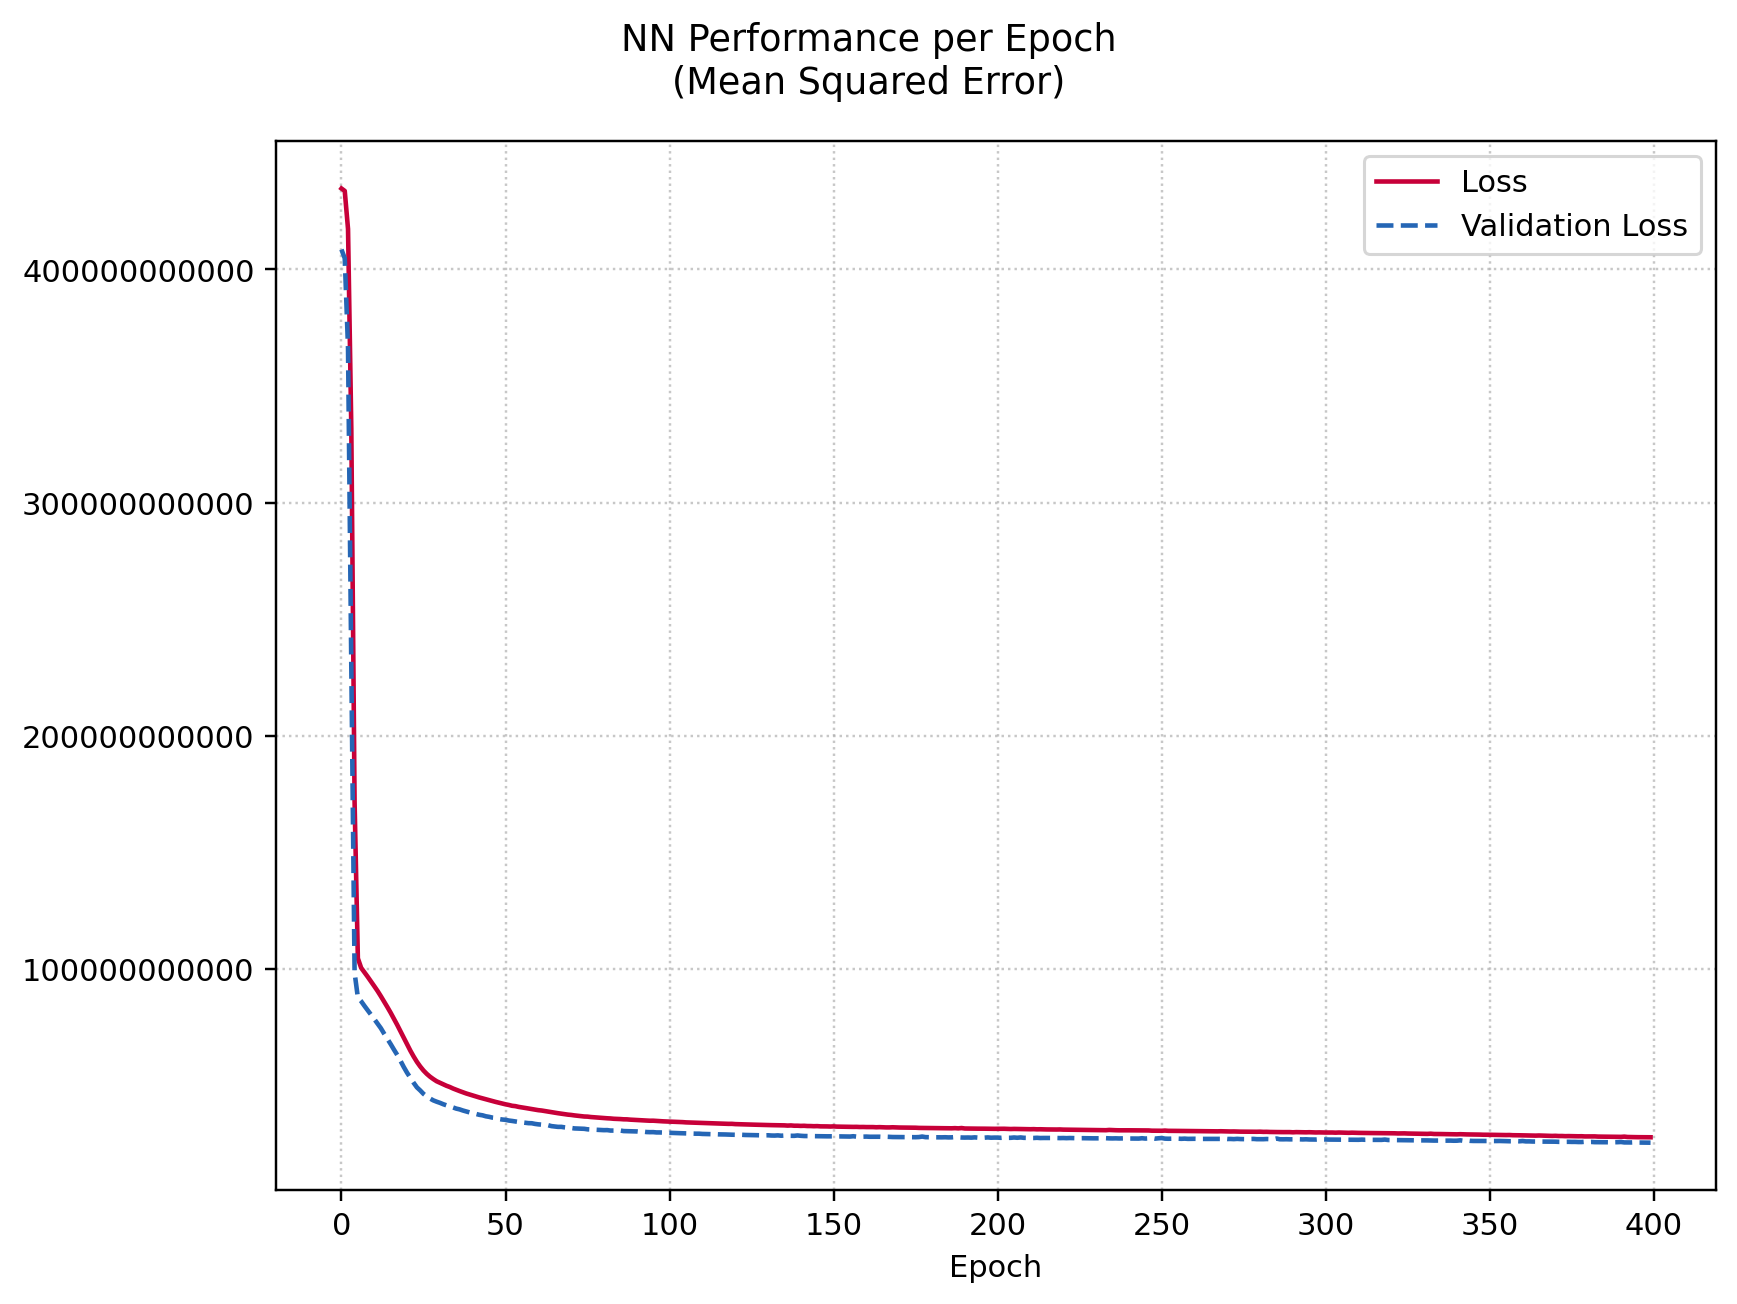

In [96]:
fig, ax = plt.subplots(figsize=(8,6), dpi=220)

xVals = model.history.epoch # array of all epochs

# loss
ax.plot(xVals, loss, color="#C70039", label="Loss")
# validation loss
ax.plot(xVals, val_loss, color="#2566B5",
        label="Validation Loss", linestyle="--")

ax.legend(loc="best")
ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)

ax.ticklabel_format(axis="both", style="plain")
ax.set_xlabel("Epoch")
fig.suptitle("NN Performance per Epoch\n(Mean Squared Error)")
fig.tight_layout();

In [113]:
print(f"Mean Squared Error Loss at end of training: {loss.iloc[-1]}")
print(f"Root Mean Squared Error Loss at end of training: ${round(np.sqrt(loss.iloc[-1]), ndigits=4)}")

print(f"\nAverage Sale Price of Houses in Dataset -> \nMinimum: ${df['price'].mean()}")

Mean Squared Error Loss at end of training: 27913703424.0
Root Mean Squared Error Loss at end of training: $167073.946

Average Sale Price of Houses in Dataset -> 
Minimum: $540296.5735055795


### Observation
1. Both **training loss & validation loss** keep **decreasing <ins>continuously</ins>** as epochs increase
    - suggests that model performed well and is **not overfitting** the data
    ---
2. After around **150 epochs** the **reduction in loss per epoch** is very low
    - suggests that if needed, training could have been stopped earlier without compromising much on quality upto this point
    ---
3. **Validation loss** is **not spiking up** even at higher epochs
    - suggests that we may choose to **continue training** if we want to **reduce losses further**

## Evaluating on Test Dataset

In [115]:
# metrics for evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [117]:
# predictions on test set

predictions = model.predict(x=X_test_scaled);

203/203 [==============================] - 0s 978us/step


In [118]:
# mean absolute error
mae = mean_absolute_error(y_true=y_test, y_pred=predictions)

# mean squared error
mse = mean_squared_error(y_true=y_test, y_pred=predictions)

# root mean squared error
rmse = np.sqrt(mse)

In [119]:
print(f"Mean Absolute Error = ${round(mae, ndigits=4)}")
print(f"Mean Squared Error = {mse}")
print(f"Root Mean Absolute Error = ${round(rmse, ndigits=4)}")

Mean Absolute Error = $99681.1907
Mean Squared Error = 25596365376.374866
Root Mean Absolute Error = $159988.6414


>_For understanding whether **Mean Absolute Error** and **RMSE** values and hence understand how NN model performed on Test set we need to consider the **ranges of values** for sale price of houses in our **Data set**._

In [126]:
# check actual price target variable
average_price = df["price"].mean()

print(f"Average sale price of houses = ${round(average_price, ndigits=4)}")

Average sale price of houses = $540296.5735


In [132]:
# error in predictions compared to actual average sale price

error = mae/average_price

print(f"Error in predictions compared to actual average sale price = {(round(error, ndigits=4))*100}%")

Error in predictions compared to actual average sale price = 18.45%


In [133]:
# get R^2 score for model

r2 = r2_score(y_true=y_test, y_pred=predictions)

print(f"R^2 for NN Model (Best score is 1.00) = {r2}")

R^2 for NN Model (Best score is 1.00) = 0.7922522845467076


## Visualizing Actual House Prices and Predictions

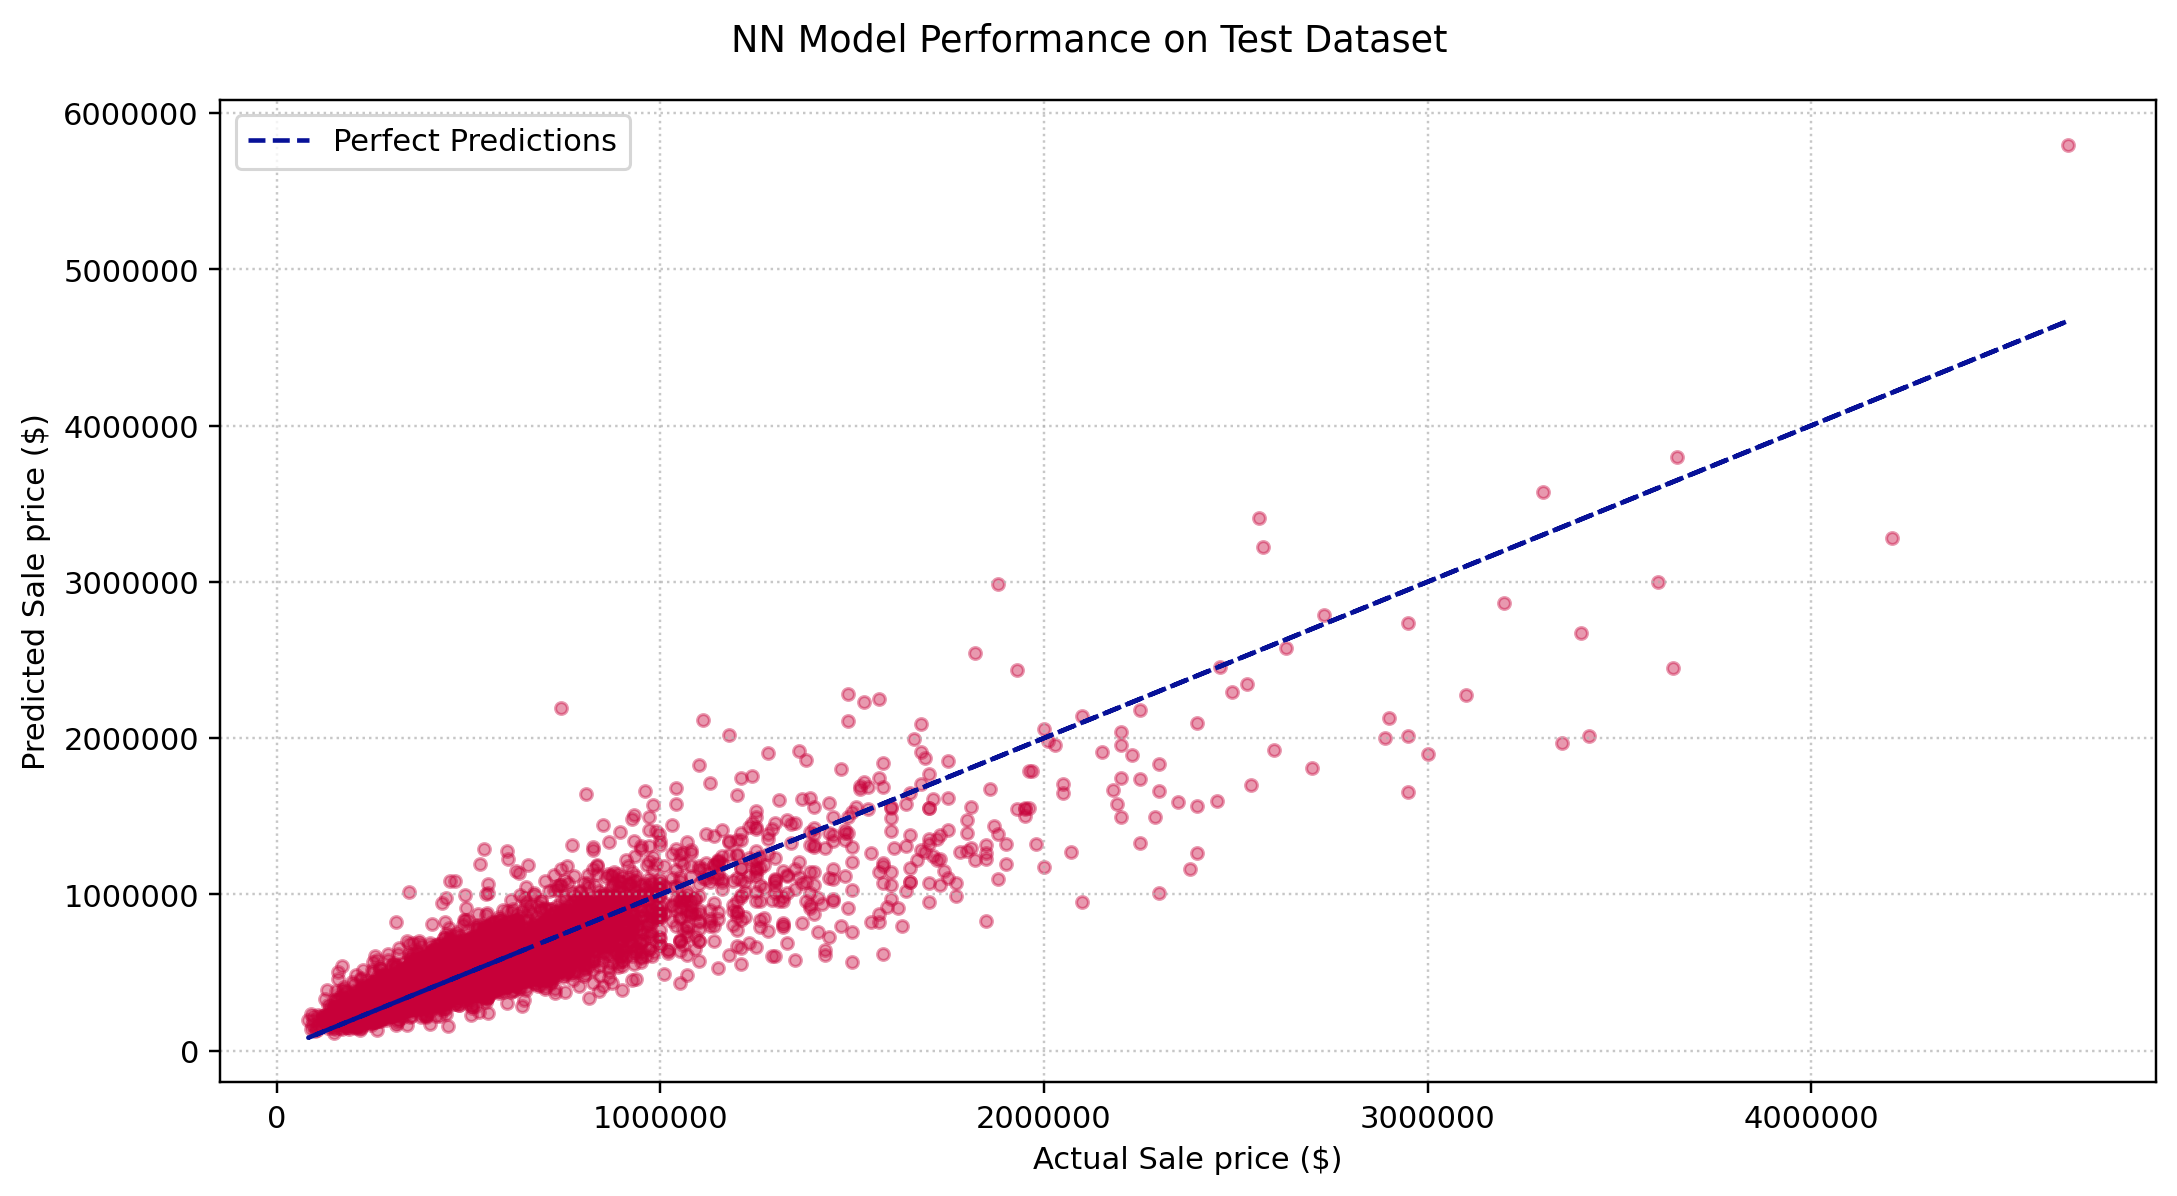

In [139]:
fig, ax = plt.subplots(figsize=(10,5.5), dpi=220)

xVals = y_test # true values
yVals = predictions # predicted values

ax.scatter(xVals, yVals, marker="o",
          s=15, color="#C70039", alpha=0.4)
# line of perfect performance
ax.plot(xVals, xVals, linestyle="--",
       color="#071198", label="Perfect Predictions")

ax.grid(linestyle=":", linewidth=0.8, alpha=0.7)
ax.set_xlabel("Actual Sale price ($)")
ax.set_ylabel("Predicted Sale price ($)")
ax.ticklabel_format(style="plain", axis="both")
ax.legend(loc="best")

fig.suptitle("NN Model Performance on Test Dataset")
fig.tight_layout();

### Observation
1. Few of the **remaining outlier houses** in dataset which sold for very large prices compared to majority of the houses seems to be the reason why model's performance was not better
    - upto houses which actually sold for $\approx \$1500000-2000000 $ the model performed quite well
    - for the houses with actual sale value $>\$2000000$ the model starts performing relatively poorlt

---
>_Given that **removing the remaining outliers** shows promise of improving model performance it may be worth the try._

>>_i.e. **Cleaning** the dataset further and removing remaining outliers $\rightarrow$ **Splitting** dataset into Training & Test set again $\rightarrow$ **Re-training** a NN again on this new dataset._

>>_If we choose to do so, can even experiment with the **NN architecture** such as no. of **hidden layers**, no. of **neurons** in each layer, etc._
---